In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import odeint
import time
from IPython import display
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.titlepad'] = 40 
plt.rcParams['axes.labelpad'] = 16 

In [2]:
#Set timescale

#Old enceladus:
t_plot = np.arange(-4.500, 0.001, 0.001)
t = np.arange(0, 4.501, 0.001) * 10**9 

#Young enceladus:
# t_plot = np.arange(-100.000, 0.001, 0.001)
# t = np.arange(0, 100.001, 0.001) * 10**6 

t_step = t[1] - t[0] 
N = len(t)


In [3]:
# #Calculate ocean mass
R_enc = 252 #km
A_enc = 4*np.pi*(R_enc*1000)**2 #m^2
V_enc = (4/3)*np.pi*R_enc**3
V_ocean = 0.4*V_enc #km^3
rho_ocean = 1030 #kg m^3
M_ocean = (V_ocean * 1000**3) * rho_ocean
print(M_ocean)

#other constants:
N_A = 6.022*10**23
n_ice = 9e5 #g/m^3, ice density
M_H2O = 18.01 #g/mol

print(V_ocean)

2.7617696180897518e+19
26813297.263007298


In [4]:
((M_ocean*1000)/(1.4e24))*3e18

5.918077753049468e+16

In [5]:
#Start at the Surface
#O2 Delivery through the Ice Shell

#take south pole region to span 60 deg south latitude
#integrate to get surface area of south pole

def Afunc_phi(x):
	return np.sin(x)
def Afunc_theta(x):
	return 1
	
Aphi_int = integrate.quad(Afunc_phi, 0, np.pi/6.0)
Atheta_int = integrate.quad(Afunc_theta, 0, 2*np.pi)

A_SF = (R_enc*1000)**2 * Aphi_int[0] * Atheta_int[0] #m^2

### Snowfall rate --consider steady-state system at south pole ###

#Include some varying snow fall rates
#old enceladus burial rates:
burial = np.asarray([10**-4, 10**-3, 10**-2, 10**-1, 0.5]) * 10**-3 #m/yr

#young enceladus burial rates:
# burial = np.asarray([10**-1, 0.2, 0.5]) * 10**-3 #m/yr

#sputtering rate:
sput = 6e23 #molecules O2/s

rO2_ice = (A_SF/A_enc) * (sput*3600*24*365)/N_A #moles/yr in south pole only

#Calculate initial delivery period
r_ice = 5.0 #km
t_del = r_ice/(burial * 10**-3)#km/(km yr^-1) = yr

def buildup(t, t_del, rO2):
    N = len(t)
    O2 = np.zeros(N)
    t_step = t[1] - t[0]
    for i in range(0,N):
        time = t[i]
        if time <= t_del:
            O2[i] = 0.0
        else:
            O2[i] = (rO2 * t_step) + O2[i-1]
    return O2

O2_ice = np.zeros([len(burial), len(t)])
for i in range(0,len(burial)):
    O2_ice[i] = buildup(t, t_del[i], rO2_ice)
    

In [6]:
#0.5 #mm/yr
d = 20 #km
time_tot = 4.5e9 #years
print((d/t)*1000*1000) #km/yr -> mm/yr

[           inf 2.00000000e+01 1.00000000e+01 ... 4.44642063e-03
 4.44543232e-03 4.44444444e-03]


/Users/cray/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2146: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2146: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


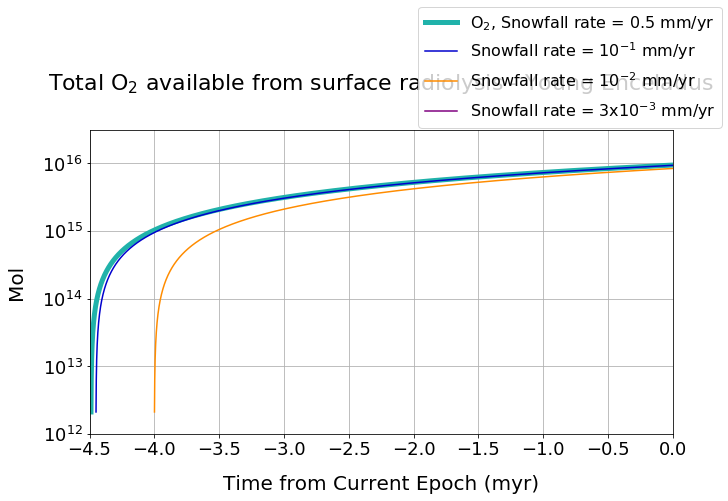

In [7]:
#Convert all zeros to nan for plotting
def zero_to_nan(values):
    return [float('nan') if x==0 else x for x in values]

#Old Enceladus:
fig1 = plt.figure(1)
fig1.set_figheight(6.5)
fig1.set_figwidth(10)
plt.clf()
plt.plot(t_plot, zero_to_nan(O2_ice[4]), color = 'lightseagreen', linewidth = 5.0, label = ('O$_2$, Snowfall rate = 0.5 mm/yr'))
plt.plot(t_plot, zero_to_nan(O2_ice[3]), color = 'mediumblue', label = ('Snowfall rate = $10^{-1}$ mm/yr'))
plt.plot(t_plot, zero_to_nan(O2_ice[2]), color = 'darkorange', label = ('Snowfall rate = $10^{-2}$ mm/yr'))
plt.plot(t_plot, zero_to_nan(O2_ice[1]), color = 'purple', label = ('Snowfall rate = 3x$10^{-3}$ mm/yr'))
plt.yscale('symlog')
plt.xlabel('Time from Current Epoch (myr)')
plt.ylabel('Mol')
plt.xlim(-4.5, 0)
plt.ylim(10**12, 10**16.5)
plt.title(r"Total O$_2$ available from surface radiolysis - Young Enceladus") 
plt.legend(bbox_to_anchor=(0.55,0.98), prop={'size': 16})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()

#Young Enceladus:
# fig1 = plt.figure(1)
# fig1.set_figheight(6.5)
# fig1.set_figwidth(10)
# plt.clf()
# plt.plot(t_plot, zero_to_nan(O2_ice[2]), color = 'lightseagreen', linewidth = 5.0, label = ('O$_2$, Snowfall rate = 0.5 mm/yr'))
# plt.plot(t_plot, zero_to_nan(O2_ice[1]), color = 'mediumblue', label = ('Snowfall rate = 0.2 mm/yr'))
# plt.yscale('symlog')
# plt.xlabel('Time from Current Epoch (myr)')
# plt.ylabel('Mol')
# plt.xlim(-100, 0)
# plt.ylim(10**11, 10**15.01)
# #plt.title(r"Total O$_2$ available from surface radiolysis - Young Enceladus") 
# plt.legend(bbox_to_anchor=(0.55,0.98), prop={'size': 16})
# plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
# plt.grid()
# plt.savefig('./Young Enceladus/YoungEnceladus_O2.png')



In [8]:
#Calculate O2 mixing ratio
O2_mix = rO2_ice * (1/burial) * (1/A_SF) * (1/n_ice) * M_H2O # mol O2/ mol H2O

print(O2_mix)

[7.87911363e-03 7.87911363e-04 7.87911363e-05 7.87911363e-06
 1.57582273e-06]


In [9]:
#convert sputtering rate to deposition rate
r_sput = 2.4e24/(A_enc) #molecules H2O/s/m^2
r_loss = (r_sput * (1/N_A) * M_H2O/n_ice) * (1000*3600*24*365) #mm/yr
print(r_loss)

3.1516454531601456e-06


In [10]:
create = np.loadtxt('peroxide_create.txt')
destroy = np.loadtxt('peroxide_destroy.txt')
xx = np.loadtxt('xx.txt')
dxx = np.loadtxt('dxx.txt')

n_p = create/destroy #total molecules peroxide
n = (n_ice/M_H2O)*N_A*(1/100)**3  #1/cm3
concEq = n_p/n

fname = open('Peroxide_Concentration.txt')

conc_all = np.zeros([len(burial), len(xx)])
for i, lines in enumerate(fname):
     if i > 1: 
            values = lines.split()
            conc_all[0, i-2] = values[0]
            conc_all[1, i-2] = values[1]
            conc_all[2, i-2] = values[2]
            conc_all[3, i-2] = values[3]
            conc_all[4, i-2] = values[4]
fname.close()

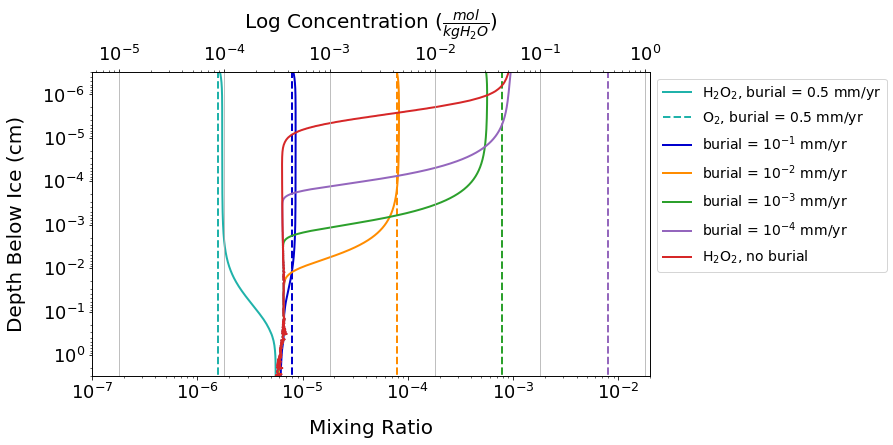

In [11]:



#Plot peroxide for each burial rate
mixing_range = np.logspace(-7, np.log10(2e-2), 6)
conc_range = mixing_range*1000/18.015 #mol/kg H20

#Old Enceladus:
fig2 = plt.figure(2)
fig2.set_figheight(6.5)
fig2.set_figwidth(12.5)
plt.clf()

ax1 = fig2.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(conc_range)
ax2.set_xscale('log')

# ax1.loglog([1e-8,3e0],[O2_mix[0], O2_mix[0]],'--', linewidth = 2.0, color = '#1f77b4', label = 'O$_2$, burial = $10^{-4}$ mm/yr')
# ax1.loglog(xx,concEq, linewidth = 2.0, color = '#2ca02c', label = 'H$_2$O$_2$, no burial')
# ax1.loglog(xx,conc_all[0], linewidth = 2.0, color = '#1f77b4')
# ax1.loglog(xx,conc_all[1], linewidth = 2.0, color = '#ff7f0e', label = 'burial = $10^{-3}$ mm/yr')
# ax1.loglog([1e-8,3e0],[O2_mix[1], O2_mix[1]],'--', linewidth = 2.0, color = '#ff7f0e')
# ax1.loglog(xx,conc_all[2], linewidth = 2.0, color = '#d62728', label = 'burial = $10^{-2}$ mm/yr')
# ax1.loglog([1e-8,3e0],[O2_mix[2],O2_mix[2]],'--', linewidth = 2.0, color = '#d62728')
# ax1.loglog(xx,conc_all[3], linewidth = 2.0, color = '#9467bd', label = 'burial = $10^{-1}$ mm/yr')
# ax1.loglog([1e-8,3e0],[O2_mix[3],O2_mix[3]],'--', linewidth = 2.0, color = '#9467bd')
# ax1.loglog(xx,conc_all[4], linewidth = 5.0, color = '#17becf', label = 'burial = 0.5 mm/yr')
# ax1.loglog([1e-8,3e0],[O2_mix[4],O2_mix[4]], '--', linewidth = 5.0, color = '#17becf',)
# ax1.loglog([1e-8,3e0],[O2_mix[0], O2_mix[0]],'--', linewidth = 2.0, color = '#1f77b4', label = 'O$_2$, burial = $10^{-4}$ mm/yr')


ax1.loglog(conc_all[4], xx, linewidth = 2.0, color = 'lightseagreen', label = 'H$_2$O$_2$, burial = 0.5 mm/yr')
ax1.loglog([O2_mix[4],O2_mix[4]], [1e-8,3e0], '--', linewidth = 2.0, color = 'lightseagreen', label = 'O$_2$, burial = 0.5 mm/yr')
ax1.loglog(conc_all[3], xx, linewidth = 2.0, color = 'mediumblue', label = 'burial = $10^{-1}$ mm/yr')
ax1.loglog([O2_mix[3],O2_mix[3]], [1e-8,3e0], '--', linewidth = 2.0, color = 'mediumblue')
ax1.loglog(conc_all[2], xx, linewidth = 2.0, color = 'darkorange', label = 'burial = $10^{-2}$ mm/yr')
ax1.loglog([O2_mix[2],O2_mix[2]], [1e-8,3e0], '--', linewidth = 2.0, color = 'darkorange')
ax1.loglog(conc_all[1], xx, linewidth = 2.0, color = '#2ca02c', label = 'burial = $10^{-3}$ mm/yr')
ax1.loglog([O2_mix[1], O2_mix[1]], [1e-8,3e0], '--', linewidth = 2.0, color = '#2ca02c')
ax1.loglog(conc_all[0], xx, linewidth = 2.0, color = '#9466bd', label = 'burial = $10^{-4}$ mm/yr')
ax1.loglog([O2_mix[0], O2_mix[0]], [1e-8,3e0], '--', linewidth = 2.0, color = '#9467bd')
ax1.loglog(concEq, xx, linewidth = 2.0,  color = '#d62728', label = 'H$_2$O$_2$, no burial')


ax1.set_ylabel('Depth Below Ice (cm)')
ax1.set_xlabel(r'Mixing Ratio')#VS cm
#ax1.title('O$_2$ and H$_2$O$_2$ Concentration Profiles')
ax1.set_ylim(3e0, 3e-7)
ax1.set_xlim(1e-7, 2e-2)
ax2.set_xlim(5.55092978e-06, 1.11018596)
ax2.set_xlabel(r'Log Concentration ($\frac{mol}{kg H_2O}$)')
ax1.legend(bbox_to_anchor=(1,1), prop={'size': 14})
plt.grid()
plt.subplots_adjust(left=0.1, right=0.72, top=0.8, bottom=0.15)
plt.savefig('Concentrations.png')

#Young Enceladus:
# fig2 = ax1.figure(2)
# fig2.set_figheight(6.5)
# fig2.set_figwidth(12.5)
# ax1.loglog(xx,concEq, label = 'H$_2$O$_2$, no burial', color = 'red')
# ax1.loglog([1e-8,3e0],[O2_mix[0],O2_mix[0]],'--', color = 'g', label = 'O$_2$, burial = $10^{-1}$ mm/yr')
# ax1.loglog(xx,conc_all[0], color = 'g', label = 'H$_2$O$_2$, burial = $10^{-1}$ mm/yr')
# ax1.loglog(xx,conc_all[1], color = '#8c564b', label = 'burial = 0.2 mm/yr')
# ax1.loglog([1e-8,3e0],[O2_mix[1],O2_mix[1]],'--', color = '#8c564b')
# ax1.loglog(xx,conc_all[2], color = 'orange', label = 'burial = 0.5 mm/yr')
# ax1.loglog([1e-8,3e0],[O2_mix[2],O2_mix[2]],'--', color = 'orange')
# ax1.xlabel('Distance(cm)')
# ax1.ylabel(r'Mixing Ratio')#VS cm
# #ax1.title('O$_2$ and H$_2$O$_2$ Concentration Profiles')
# ax1.xlim(1e-8, 3e0)
# ax1.ylim(1e-7, 1e-2)
# ax1.legend(bbox_to_anchor=(1,1), prop={'size': 14})
# ax1.grid()
# ax1.subplots_adjust(left=0.1, right=0.72, top=0.8, bottom=0.15)
# ax1.savefig('./Young Enceladus/YoungEnceladus_Concentrations.png')


#check that integrated differences between O2 & H2O2 and new extent & old extent match up

In [12]:
#Now we have the H2O2 concentration profile in the ice - take the last value to be the "frozen in" conc

#turn concentration into delivery rate 
r_H2O2 = np.zeros(len(burial))
for i in range(0, len(burial)):
    r_H2O2[i] = conc_all[i,-1]*burial[i]*A_SF*n_ice/18.015 #(H2O2/H2O) * m/yr * m^2 * g/m^3 * (mol H2O/g)  = mol H2O2/yr
    
H2O2_ice = np.zeros([len(burial), len(t)])
for i in range(0,len(burial)):
    H2O2_ice[i] = buildup(t, t_del[i], r_H2O2[i])

# print(r_H2O2[5])
# print(rO2_ice[5])
print(r_H2O2[len(burial)-1])
print(rO2_ice)
print(r_H2O2[len(burial)-1] + rO2_ice)
# # print(burial)
# print(O2_ice)
# print(H2O2_ice)

r_ice_total = r_H2O2[len(burial)-1] + rO2_ice

7403498.490855425
2104793.8556562318
9508292.346511656


In [13]:
burial

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 5.e-04])

/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2146: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2146: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


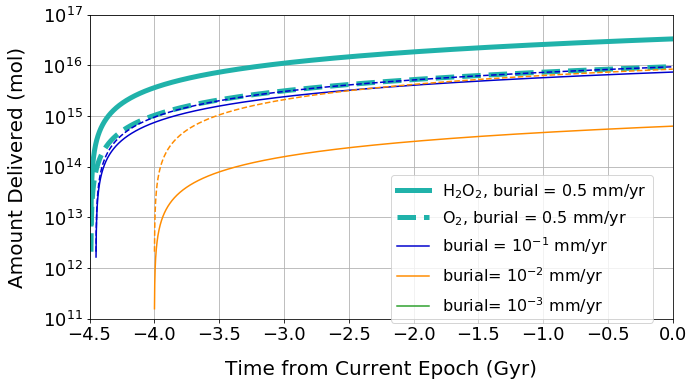

In [14]:
#Plot cumulative oxidant delivery from ice shell


#Old Enceladus:
fig3 = plt.figure(3)
fig3.set_figheight(6.5)
fig3.set_figwidth(10)
plt.clf()
plt.plot(t_plot, zero_to_nan(H2O2_ice[4]), color = 'lightseagreen', linewidth = 5.0, label = ('H$_2$O$_2$, burial = 0.5 mm/yr'))
plt.plot(t_plot, zero_to_nan(O2_ice[4]), '--', color = 'lightseagreen', linewidth = 5.0, label = ('O$_2$, burial = 0.5 mm/yr'))
plt.plot(t_plot, zero_to_nan(O2_ice[3]), '--', color = 'mediumblue')
plt.plot(t_plot, zero_to_nan(H2O2_ice[3]), color = 'mediumblue', label = 'burial = $10^{-1}$ mm/yr')
plt.plot(t_plot, zero_to_nan(O2_ice[2]), '--', color = 'darkorange')
plt.plot(t_plot, zero_to_nan(H2O2_ice[2]), color = 'darkorange', label = 'burial= $10^{-2}$ mm/yr')
plt.plot(t_plot, zero_to_nan(O2_ice[1]), '--', color = '#2ca02c')
plt.plot(t_plot, zero_to_nan(H2O2_ice[1]), color = '#2ca02c', label = 'burial= $10^{-3}$ mm/yr')
#plt.plot(t_plot, zero_to_nan(O2_ice[2]), color = 'purple', label = ('Plume rate = 3x$10^{-2}$ mm/yr'))
#plt.plot(t_plot, zero_to_nan(H2O2_ice[2]), '--', color = 'purple')
plt.yscale('symlog')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Amount Delivered (mol)')
plt.xlim(-4.5, 0)
plt.ylim(10**11, 10**17.001)
#plt.title("Total Oxidants Available from Surface Radiolysis") 
plt.legend(bbox_to_anchor=(0.98,0.5), prop={'size': 16})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('TotalOxidants_Surface.png')

#Young Enceladus:
# fig3 = plt.figure(3)
# fig3.set_figheight(6.5)
# fig3.set_figwidth(10)
# plt.clf()
# plt.plot(t_plot, zero_to_nan(H2O2_ice[2]), color = 'lightseagreen', linewidth = 5.0, label = ('H$_2$O$_2$, burial = 0.5 mm/yr'))
# plt.plot(t_plot, zero_to_nan(O2_ice[2]), '--', color = 'lightseagreen', linewidth = 5.0, label = ('O$_2$, burial = 0.5 mm/yr'))
# plt.plot(t_plot, zero_to_nan(O2_ice[1]), '--', color = 'mediumblue')
# plt.plot(t_plot, zero_to_nan(H2O2_ice[1]), color = 'mediumblue', label = ('burial = 0.2 mm/yr'))
# #plt.plot(t_plot, zero_to_nan(O2_ice[0]), '--', color = 'darkorange', label = ('burial = $10^{-1}$ mm/yr'))
# #plt.plot(t_plot, zero_to_nan(H2O2_ice[0]), color = 'darkorange')
# plt.yscale('symlog')
# plt.xlabel('Time from Current Epoch (Myr)')
# plt.ylabel('Amount Delivered (mol)')
# plt.xlim(-100, 0)
# #plt.ylim(10**11, 10**17.001)
# #plt.title("Total Oxidants Available from Surface Radiolysis") 
# plt.legend(bbox_to_anchor=(0.6,0.5), prop={'size': 16})
# plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
# plt.grid()
# plt.savefig('./Young Enceladus/YoungEnceladus_SurfaceOxidants.png', bbox_inches = 'tight')


In [15]:
O2_ice[4][-1]
H2O2_ice[4][-1]

3.324170822394251e+16

In [16]:
print(O2_ice[len(burial)-1])
print(H2O2_ice[len(burial)-1])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.44631482e+15
 9.44841962e+15 9.45052441e+15]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.32269012e+16
 3.32343047e+16 3.32417082e+16]


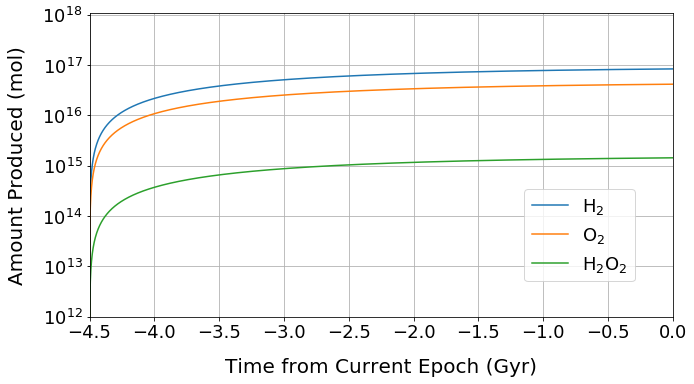

In [17]:
#Potassium Decay in the Ocean 

#From Draganic et al:
lambda_K = 5.4 * 10**-10 #yr^-1

M_D = 1.4 * 10**21 #kg
rH2_D = (3.8 * 10**18)/(2.016 * 100 * 10**6 * M_D)
rO2_D = (3.0 * 10**19)/(32.02 * 100 * 10**6 * M_D)
rH2O2_D = (1.1 * 10**18)/(34.015 * 100 * 10**6 * M_D)

K40_D = (6 * 10**18)/N_A

kH2 = rH2_D/K40_D #yr^-1
kO2 = rO2_D/K40_D
kH2O2 = rH2O2_D/K40_D
kH2C = 2*kO2 + kH2O2

#Calculate K40 concentration 4.5 Gyr ago (K40_0) and as a function of time (K40)
K_conc = 1.0 * 10**-3 #mol/kg H2O
K = K_conc*M_ocean #total moles
K40_frac = 1.17 * 10**-4
K40_now = K * K40_frac 

K40_0 = K40_now * np.exp(lambda_K * t[-1]) 

def K40(t):
    K40 = K40_0*np.exp(-lambda_K*t)
    return K40

def K40_rates(k,t):
    r = k*K40(t)
    return r

r_H2K = K40_rates(kH2,t)
r_O2K = K40_rates(kO2,t)
r_H2O2K = K40_rates(kH2O2,t)

#try it analytically to make sure it's the same:
def conc_an(k , K_0, t, l): 
    C = (k*K_0*(1 - np.exp(-l*t)))/l
    return C
         
H2D = conc_an(kH2, K40_0, t, lambda_K)
O2D = conc_an(kO2, K40_0, t, lambda_K)
H2O2D = conc_an(kH2O2, K40_0, t, lambda_K)
         
# rH2, H2D = conc(kH2, K40, t, t_step) #mol
# rH2C, H2DC = conc(kH2C, K40, t, t_step)
# rO2, O2D = conc(kO2, K40, t, t_step)
# rH2O2, H2O2D = conc(kH2O2, K40, t, t_step)    

#Old Enceladus
fig7 = plt.figure(7)
fig7.set_figheight(6.5)
fig7.set_figwidth(10)
plt.clf()
plt.plot(t_plot, H2D, label = 'H$_2$')
plt.plot(t_plot, O2D, label = 'O$_2$')
plt.plot(t_plot, H2O2D, label = 'H$_2$O$_2$')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Amount Produced (mol)')
plt.yscale('symlog')
plt.xlim(-4.5, 0)
plt.ylim(1e12, 1.1e18)
#plt.title(r"Radiolytic products from $^{40}K$ decay in the ocean")
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.legend(bbox_to_anchor=(0.95,0.45), prop={'size': 18})
plt.grid()
plt.savefig('TotalO2_K40DecayPUB.png')

#Young Enceladus:
# fig7 = plt.figure(7)
# fig7.set_figheight(6.5)
# fig7.set_figwidth(10)
# plt.clf()
# plt.plot(t_plot, H2D, label = 'H$_2$')
# plt.plot(t_plot, O2D, label = 'O$_2$')
# plt.plot(t_plot, H2O2D, label = 'H$_2$O$_2$')
# plt.xlabel('Time from Current Epoch (Myr)')
# plt.ylabel('Amount Produced (mol)')
# plt.yscale('symlog')
# plt.xlim(-100, 0)
# plt.ylim(1e10, 1.1e15)
# #plt.title(r"Radiolytic products from $^{40}K$ decay in the ocean")
# plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
# plt.legend(bbox_to_anchor=(0.95,0.45), prop={'size': 20})
# plt.grid()
# plt.savefig('./Young Enceladus/YoungEnceladus_K40Decay.png')

# # print(H2O2D[-1]/(O2D[-1] + H2O2D[-1]))

In [18]:
print(O2D[-1]/M_ocean)
print(O2D[1]/M_ocean)

0.0015075314582310804
8.924123890014759e-07


In [19]:
(((0.693*K40_0)/(1.3e9*365*24*3600)) * (1.3e6/10))

80.65578606019565

In [20]:
M_ocean

2.7617696180897518e+19

In [21]:
K40_0 - K40_now

33472349592929.227

In [22]:
(1e-4*M_ocean) #mol of Hydrogen
111 #mol H2 escaping/s
((1e-4*M_ocean)/111)/(3600*24*365)

788965.2260964594

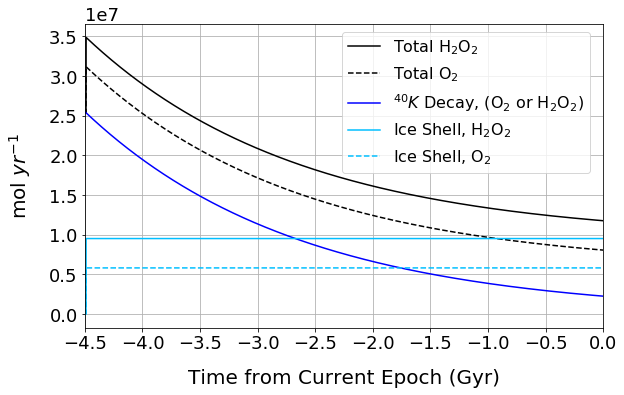

In [23]:
#Now lets look at the actual rate
rO2_icetotal = np.zeros(N)
for i in range (0, len(t)):
    if t[i] <= t_del[-1]:
        rO2_icetotal[i] = 0.0
    else:
        rO2_icetotal[i] = 0.5*r_H2O2[len(burial)-1] + rO2_ice
        
rH2O2_icetotal = np.zeros(N)
for i in range (0, len(t)):
    if t[i] <= t_del[-1]:
        rH2O2_icetotal[i] = 0.0
    else:
        rH2O2_icetotal[i] = r_H2O2[len(burial)-1] + rO2_ice
        
rO2_total = rO2_icetotal + r_O2K + r_H2O2K
rH2O2_total = rH2O2_icetotal + r_O2K + r_H2O2K 

#Old Enceladus:
fig8 = plt.figure(8)
fig8.set_figheight(6.5)
fig8.set_figwidth(9)
plt.clf()
plt.plot(t_plot, rH2O2_total, 'k-', label = 'Total H$_2$O$_2$')
plt.plot(t_plot, rO2_total, 'k--', label = 'Total O$_2$')
plt.plot(t_plot, (r_O2K + r_H2O2K),'b-', label = '$^{40}K$ Decay, (O$_2$ or H$_2$O$_2$)')
plt.plot(t_plot, rH2O2_icetotal, color = 'deepskyblue', label = 'Ice Shell, H$_2$O$_2$')
plt.plot(t_plot, rO2_icetotal, '--', color = 'deepskyblue', label = 'Ice Shell, O$_2$')
#plt.plot([-2.700,-2.700], [0,3.5e7], 'k-')
plt.plot
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('mol $yr^{-1}$')
plt.xlim(-4.5, 0)
#plt.ylim(0.0, 8.0 * 10**16)
#plt.title(r"Rate of $O_{2}$ Production from $^{40}K$ Decay vs Ice Shell")
plt.legend(bbox_to_anchor=(0.99,1), prop={'size': 16})
plt.subplots_adjust(left=0.13, right=0.93, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('O2ProductionRates.png')

#Young Enceladus:
# fig8 = plt.figure(8)
# fig8.set_figheight(6.5)
# fig8.set_figwidth(9)
# plt.clf()
# plt.plot(t_plot, (r_O2K + r_H2O2K), 'b-', label = '$^{40}K$ Decay')
# plt.plot(t_plot, rO2_icetotal, 'k-', label = 'O$_2$, Ice Shell')
# plt.plot(t_plot, rH2O2_icetotal, 'k--', label = 'H$_2$O$_2$, Ice Shell')
# plt.plot(t_plot, rO2_total, label = 'O$_2$, Total')
# plt.plot(t_plot, rH2O2_total, label = 'H$_2$O$_2$, Total')
# plt.xlabel('Time from Current Epoch (myr)')
# plt.ylabel('Moles $O_{2}$ $yr^{-1}$')
# plt.xlim(-100, 0)
# #plt.ylim(0.0, 8.0 * 10**16)
# plt.title(r"Rate of $O_{2}$ Production from $^{40}K$ Decay vs Ice Shell")
# plt.legend(bbox_to_anchor=(0.9,1), prop={'size': 16})
# plt.subplots_adjust(left=0.13, right=0.93, top=0.8, bottom=0.15)
# plt.grid()
# plt.savefig('./Young Enceladus/YoungEnceladus_ProductionRates.png')

In [24]:
print(rO2_total)
print(rH2O2_total)

[25503956.879113   25490188.46020596 25476427.47423805 ...
  8054256.90355022  8053043.46575458  8051830.68303846]
[25503956.879113   25490188.46020596 25476427.47423805 ...
 11756006.14897793 11754792.71118229 11753579.92846617]


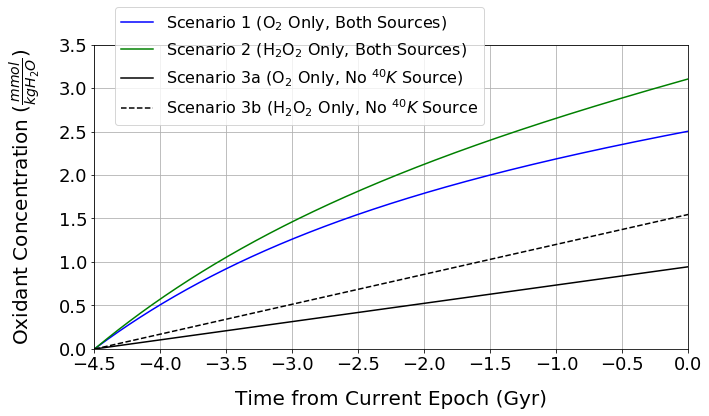

In [25]:
###Case 1 - What if all O2 and peroxide just build up in the ocean?

#All O2: 2H2O2 = 2H2O + O2
O_icetotal = O2_ice[len(burial)-1] + 0.5*H2O2_ice[len(burial)-1]
O_Ktotal = O2D + H2O2D
O_total = O_icetotal + O_Ktotal

# fig9 = plt.figure(9)
# fig9.set_figheight(6.5)
# fig9.set_figwidth(11)
# plt.clf()
# plt.plot(t_plot, (O_total/M_ocean)*1000, label = 'Total')
# plt.plot(t_plot, (O_Ktotal/M_ocean)*1000, 'b-', label = '$^{40}K$ Decay')
# plt.plot(t_plot, (O_icetotal/M_ocean)*1000, 'k-', label = 'Ice Shell')
# plt.xlabel('Time from Current Epoch (Gyr)')
# plt.ylabel(r'Concentration ($\frac{mmol}{kg H_{2}O}$)')
# plt.xlim(-4.5, 0.0)
# plt.ylim(0.0, 3.5)
# #plt.title(r"Total O$_{2}$ Concentration in the Ocean")
# plt.legend(bbox_to_anchor=(0.30,0.95), prop={'size': 18})
# plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
# plt.grid()
# plt.savefig('Cumulative_O2.png')

#All H2O2:
P_icetotal = O2_ice[len(burial)-1] + H2O2_ice[len(burial)-1]
P_Ktotal = O2D + H2O2D
P_total = P_icetotal + P_Ktotal



# #Old Enceladus:
# fig10 = plt.figure(10)
# fig10.set_figheight(6.5)
# fig10.set_figwidth(11)
# plt.clf()
# plt.plot(t_plot, (P_Ktotal/M_ocean)*1000, 'b-', label = '$^{40}K$ Decay (O$_2$ or H$_2$O$_2$)')
# plt.plot(t_plot, (O_icetotal/M_ocean)*1000, '--', color = 'deepskyblue', label = 'Ice Shell, O$_2$')
# plt.plot(t_plot, (P_icetotal/M_ocean)*1000, color = 'deepskyblue', label = 'Ice Shell, H$_2$O$_2$')
# plt.xlabel('Time from Current Epoch (Gyr)')
# plt.ylabel(r'Concentration ($\frac{mmol}{kg H_{2}O}$)')
# plt.xlim(-4.5, 0.0)
# plt.ylim(0.0, 3.5)
# #plt.title(r"Total O$_{2}$ Concentration in the Ocean")
# plt.legend(bbox_to_anchor=(0.47,1.1), prop={'size': 17})
# plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
# plt.grid()
# plt.savefig('Cumulative_O2.png')


fig11 = plt.figure(11)
fig11.set_figheight(6.5)
fig11.set_figwidth(11)
plt.clf()
plt.plot(t_plot, (O_total/M_ocean)*1000, 'b-', label = 'Scenario 1 (O$_2$ Only, Both Sources)')
plt.plot(t_plot, (P_total/M_ocean)*1000, 'g-', label = 'Scenario 2 (H$_2$O$_2$ Only, Both Sources)')
plt.plot(t_plot, (O_icetotal/M_ocean)*1000, 'k-', label = 'Scenario 3a (O$_2$ Only, No $^{40}K$ Source)')
plt.plot(t_plot, (P_icetotal/M_ocean)*1000, 'k--', label = 'Scenario 3b (H$_2$O$_2$ Only, No $^{40}K$ Source')       
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel(r'Oxidant Concentration ($\frac{mmol}{kg H_{2}O}$)')
plt.xlim(-4.5, 0.0)
plt.ylim(0.0, 3.5)
#plt.title(r"Total O$_{2}$ Concentration in the Ocean")
plt.legend(bbox_to_anchor=(0.67,1.15), prop={'size': 16})
plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('Cumulative_O2_New.png')

# fig10 = plt.figure(10)
# fig10.set_figheight(6.5)
# fig10.set_figwidth(11)
# plt.clf()
# plt.plot(t_plot, (O_total/M_ocean)*1000, 'k--', label = 'Total O$_2$')
# plt.plot(t_plot, (P_total/M_ocean)*1000, 'k-', label = 'Total H$_2$O$_2$')
# plt.plot(t_plot, (P_Ktotal/M_ocean)*1000, 'b-', label = '$^{40}K$ Decay, (O$_2$ or H$_2$O$_2$)')
# plt.plot(t_plot, (O_icetotal/M_ocean)*1000, '--', color = 'deepskyblue', label = 'Ice Shell, O$_2$')
# plt.plot(t_plot, (P_icetotal/M_ocean)*1000, color = 'deepskyblue', label = 'Ice Shell, H$_2$O$_2$')
# plt.xlabel('Time from Current Epoch (Myr)')
# plt.ylabel(r'Concentration ($\frac{mmol}{kg H_{2}O}$)')
# plt.xlim(-100, 0.0)
# plt.ylim(0.0, 0.04)
# #plt.title(r"Total O$_{2}$ Concentration in the Ocean")
# plt.legend(bbox_to_anchor=(0.5,1.1), prop={'size': 18})
# plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
# plt.grid()
# plt.savefig('./Young Enceladus/YoungEnceladus_CumulativeO2.png')

In [26]:
(P_icetotal/M_ocean)*1000

array([0.        , 0.        , 0.        , ..., 1.54514032, 1.54548461,
       1.54582889])

In [27]:
#Now set reductant concentrations in the ocean
pH = np.array([9, 9, 11, 11])
pOH = 14.94 - pH #for 0 deg C and 1 bar
OH = 10.0**(-pOH)
I = 0.1
T = 273
CO2 = np.array([7e-5, 1e-7])

## Sulfide concentration from INMS:


#Reductant concentrations - pyrrhotite
#pH9 & SiO2 = -8, pH9 & SiO2 = -3, pH11 & SiO2 = -8, pH9 & SiO2 = -3  
Fe2 = np.array([2.61E-07, 4.28E-09, 8.02E-10, 9.83E-13]) 
#H2S = np.array([2.73E-06, 0.000253, 9.67E-06, 0.02658])
H2S = np.array([4.96e-05, 4.96e-05, 2.66e-06, 2.66e-06])
### Reaction 1: 4Fe(II) + O2 + 6H2O = 4FeOOH + 8H+###
log_k1 = 21.56 - (1545/T) - 3.29*np.sqrt(I) + 1.52*I #up to pH = 8.5
k1 = (10**log_k1)*(60*24*365) #min^-1 -> yr^-1

### Reaction 2: HS + 2O2 = SO4 + H+ ###
log_k2 = 11.78 - ((3*10**3)/T) + 0.44*np.sqrt(I) #independent above pH = 8
k2 = (10**log_k2)*(24*365) #hours^-1 -> yr^-1

### Reaction 3: 2Fe(II) + H2O2 + 2H2O = 2FeOOH + 4H+ ###
log_k3 = 11.72 - 2.4*np.sqrt(I) + 1.38*I #up to pH 8
k3 = (10**log_k3)*(60*60*24*365) #s^-1 -> yr^-1

### Reaction 4: HS + 4H2O2 = SO4 + 4H2O + H+ ###
log_k4 = 8.60 - 2052/T + 0.084*np.sqrt(I) #I, pH = 8
#scale this for pH
log_k49 = 1.492/(1.66/log_k4)
log_k411 = 1.185/(1.66/log_k4)
log_k4 = np.array([log_k49, log_k49, log_k411, log_k411])
k4 = (10**log_k4) * (60*24*365) #min^-1 -> yr^-1

#Constrain H2S concentration from INMS
# H2S_upper = (100/(10**6)) * (34.08/18.015) #ppm - 1 g per 10^6 g H2O
# print(H2S_upper)

# #double check that maximum concentrations are all substantially higher than GWB
# print(Fe2_lim)
# print(H2S_lim)
# print(Fe)
# print(S)


In [28]:
k3

3.9615028116012186e+18

In [29]:
#Without worrying about K40 yet, calculate ocean concentration at equilibrium
#Case 1: All O2
A1 = ((rO2_ice + 0.5*r_H2O2[len(burial)-1])/M_ocean) #total delivery rate of [O2] + [H2O2] as a function of time
#Case 2: All H2O2
A2 = ((rO2_ice + r_H2O2[len(burial)-1])/M_ocean)

#All O2:
B1 = ((0.25*(k1*Fe2*OH**2)) + (2*k2*H2S)) #note this will have 4 values

#All H2O2
B2 = (0.5*k3*Fe2*OH + 4*k4*H2S)
 

#Solve for first 10 million years, w/o any ice shell delivery
# t_O2 = np.arange(0, 1.0, 0.001)
# N_t = len(t_O2)

# O2_conc = np.zeros([len(pH), N_t])
# for i in range (0,len(pH)):
#        O2_conc[i] = (A/B[i]) - (A/B[i])*np.exp(-B[i]*t_O2)

# fig10 = plt.figure(10)
# fig10.set_figheight(6.5)
# fig10.set_figwidth(11)
# plt.clf()
# plt.plot(t_O2, O2_conc[0], label = 'pH = 9, log(aSiO$_2$) = -8')
# plt.plot(t_O2, O2_conc[1], label = 'pH = 9, log(aSiO$_2$) = -3')
# plt.plot(t_O2, O2_conc[2], label = 'pH = 11, log(aSiO$_2$) = -8')
# plt.plot(t_O2, O2_conc[3], label = 'pH = 11, log(aSiO$_2$) = -3')
# plt.xlabel('Time (Years)')
# plt.ylabel('$O_{2}$ Concentration (mol/kg $H_{2}O$)')
# #plt.xlim(0.0, 1.0)
# #plt.ylim(0.0, 1.2*10**-13)
# #plt.yscale('symlog')
# plt.title(r"Total $O_{2}$ Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
# plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
# plt.subplots_adjust(left=0.12, right=0.8, top=0.8, bottom=0.15)
# plt.grid()
# plt.show()
# #plt.savefig('O2Conc_New.png')

In [30]:
#k_ox = 2.36*60*60*24*365
print(0.5*k3*Fe2*OH)
print(4*k4*H2S)
#print(k_ox*Fe2)
print('half lives (in minutes):')
print('H2O2 + Fe: ')
print(((0.693/(0.5*k3*Fe2*OH))*365*24*60))
print('H2O2 + HS: ')
print((0.693/(4*k4*H2S))*365*24*60)

# #Organics:
# logk_th = 1.98 - (912/273.15) #Tholins
# logk_ha = 14.77 - (4500/273.15) #humic acid
# k_th = (10**logk_th)*365 #yr^-1
# k_ha = (10**logk_ha)*365 #yr^-1

# print(k_th)
# print(k_ha)


[5.93568001e+05 9.73360553e+03 1.82391393e+05 2.23554538e+02]
[1037.36414541 1037.36414541   34.67634673   34.67634673]
half lives (in minutes):
H2O2 + Fe: 
[6.13646287e-01 3.74209535e+01 1.99702844e+00 1.62931517e+03]
H2O2 + HS: 
[  351.12144719   351.12144719 10504.0130917  10504.0130917 ]


In [31]:
10504/(24*60)


7.294444444444444

In [32]:
#Add in K40 Decay
#Start by integrating over the initial delivery period where rO2_ice = 0
C = (kO2+kH2O2)*(K40_0/M_ocean)

# t_O2 = np.arange(0.0, 1.0, 0.0001)
# O2_del9 = (C/(B[0] - lambda_K)) * (np.exp(-lambda_K*t_O2) - np.exp(-B[0]*t_O2))
# O2_del11 = (C/(B[1] - lambda_K)) * (np.exp(-lambda_K*t_O2) - np.exp(-B[1]*t_O2))

# fig11 = plt.figure(11)
# fig11.set_figheight(6.5)
# fig11.set_figwidth(9)
# plt.clf()
# plt.plot(t_O2, O2_del9, label = 'pH = 9')
# plt.plot(t_O2, O2_del11, label = 'pH = 11')
# plt.xlabel('Time (Years)')
# plt.ylabel('$O_{2}$ Concentration (mol/kg $H_{2}O$)')
# #plt.xlim(0.0, 1.0)
# #plt.ylim(0.0, 4.0*10**-14)
# plt.title(r"Total $O_{2}$ Concentration in the Ocean in the First Year")
# plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
# plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
# plt.grid()
#plt.savefig('O2Conc_1yr.png')

#Now let's try to solve the ODE numerically
#1 Year after t = 2.5 x 10^7
#Calculate the concentration at 2.5 x 10^7 years to start numerical integration
#start = len(t_O2)
#O2_0 = O2_del9[start-1]
#t_int = np.arange(2.5, 2.5000001, 0.000000001)*10**7
#t_intstep = t_int[1]-t_int[0]
# O2_conc = np.zeros(len(t_int))
# dO2_dt = np.zeros(len(t_int))

# for i in range(0, len(t_int)):
#     if i == 0:
#         O2_conc[i] = O2_0
#         dO2_dt[i] = A + C*np.exp(-lambda_K*t_int[i]) - B*O2_0
#     else:
#         O2_conc[i] = dO2_dt[i-1]*t_intstep + O2_conc[i-1]
#         dO2_dt[i] = A + C*np.exp(-lambda_K*t_int[i]) - B*O2_conc[i-1]
     
        
# fig12 = plt.figure(12)
# fig12.set_figheight(6.5)
# fig12.set_figwidth(9)
# plt.clf()
# plt.plot(t_int, O2_conc, 'b-')
# plt.xlabel('Time (Years)')
# plt.ylabel('$O_{2}$ Concentration (mol/kg $H_{2}O$)')
# #plt.xlim(2.5*10**7, 2.5000001*10**7)
# #plt.ylim(3.0*10**-14, 5.5*10**-14)
# plt.title(r"Total $O_{2}$ Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
# plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
# plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
# plt.grid()
# #plt.savefig('IntegratedO2.png')

In [33]:
# #hydrogen:
# C_H2 = np.array([1e-4,2e-7]) #mol/kg H2O
# dH2_dt = 0.5*(2.7e-5)*C_H2
# dH2_dt*M_ocean
# #10^8 to 10^10 mol/yr at 55 deg
# k_H2 = 2.7e-5 #conc/s
# O2conc_0 = O_total[-1]/M_ocean

# thalf_H2 = (O2conc_0/(k_H2*C_H2))/(3600*24*365)
# thalf_H2

In [34]:
#Calculate steady state concentration of O2 & H2O2

#Old Enceladus:
t_SS = np.arange(0, 4.50001, 0.00001)*10**9
t_SSplot = np.arange(-4.5, 0.00001, 0.00001)

#Young Enceladus:
# t_SS = np.arange(0, 100.001, 0.001)*10**6
# t_SSplot = np.arange(-100.0, 0.001, 0.001)

N_SS = len(t_SS)
SS_O2= np.zeros([len(pH), N_SS])
for i in range (0, len(pH)):
    for j in range(0, N_SS):
        #Young Enceladus:
        if t_SS[j]<=t_del[2]:
             SS_O2[i,j] = (C*np.exp(-lambda_K*t_SS[j]))/B1[i]
        else:
             SS_O2[i,j] = (A1+C*np.exp(-lambda_K*t_SS[j]))/B1[i]
 
SS_H2O2 = np.zeros([len(pH), N_SS])
for i in range (0, len(pH)):
    for j in range(0, N_SS):
        #Young Enceladus 
        if t_SS[j]<=t_del[2]:
             SS_H2O2[i,j] = (C*np.exp(-lambda_K*t_SS[j]))/B2[i]
        else:
             SS_H2O2[i,j] = (A2+C*np.exp(-lambda_K*t_SS[j]))/B2[i]             

In [35]:
#Exploring possible Fenton reaction:
dOx_dt = 2.36*SS_H2O2*Fe2[0]
print(dOx_dt)

[[9.56629578e-25 9.56624412e-25 9.56619246e-25 ... 4.40866704e-25
  4.40866249e-25 4.40865794e-25]
 [5.28102015e-23 5.28099164e-23 5.28096312e-23 ... 2.43378001e-23
  2.43377750e-23 2.43377499e-23]
 [3.11806904e-24 3.11805220e-24 3.11803536e-24 ... 1.43697503e-24
  1.43697355e-24 1.43697207e-24]
 [2.20274612e-21 2.20273422e-21 2.20272233e-21 ... 1.01514467e-21
  1.01514363e-21 1.01514258e-21]]


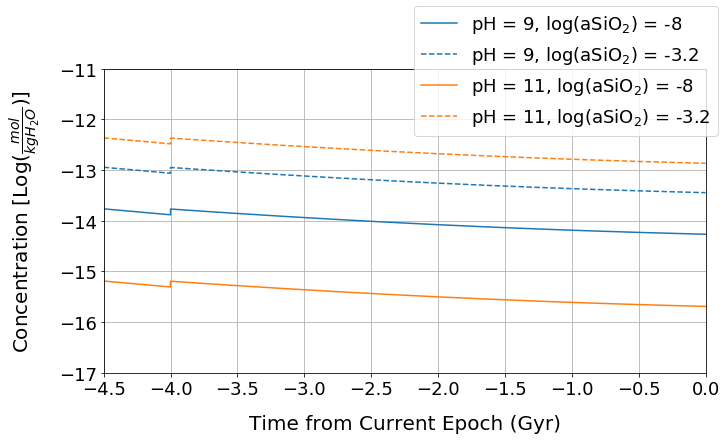

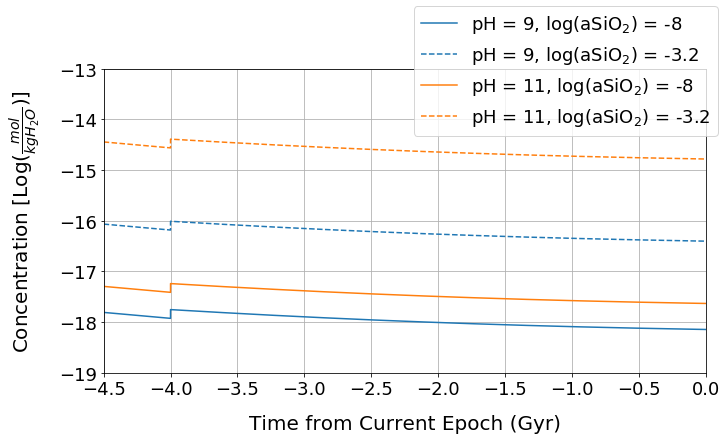

In [36]:
#Old Enceladus:
plt.rcParams['axes.titlepad'] = 80 
fig13 = plt.figure(13)
fig13.set_figheight(6.5)
fig13.set_figwidth(11)
plt.clf()
plt.plot(t_SSplot, np.log10(SS_O2[0]), color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -8')
plt.plot(t_SSplot, np.log10(SS_O2[1]), '--', color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -3.2')
plt.plot(t_SSplot, np.log10(SS_O2[2]), color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -8')
plt.plot(t_SSplot, np.log10(SS_O2[3]), '--', color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -3.2')
#plt.yscale('symlog')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]')
plt.xlim(-4.5, 0)
plt.ylim(-17,-11)
#plt.title('Steady State O$_2$ Concentration in the Ocean') 
plt.legend(bbox_to_anchor=(0.5,0.75), prop={'size': 18})
plt.grid()
plt.subplots_adjust(left=0.17, right=0.93, top=0.8, bottom=0.15)
plt.savefig('O2SS.png')

fig14 = plt.figure(14)
fig14.set_figheight(6.5)
fig14.set_figwidth(11)
plt.clf()
plt.plot(t_SSplot, np.log10(SS_H2O2[0]), color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -8')
plt.plot(t_SSplot, np.log10(SS_H2O2[1]), '--', color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -3.2')
plt.plot(t_SSplot, np.log10(SS_H2O2[2]), color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -8')
plt.plot(t_SSplot, np.log10(SS_H2O2[3]), '--', color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -3.2')
#plt.yscale('symlog')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]')
plt.xlim(-4.5, 0)
plt.ylim(-19,-13)
#plt.title('Steady State H$_2$O$_2$ Concentration in the Ocean') 
plt.legend(bbox_to_anchor=(0.5,0.75), prop={'size': 18})
plt.grid()
plt.subplots_adjust(left=0.17, right=0.93, top=0.8, bottom=0.15)
plt.savefig('H2O2SS.png')


#Young Enceladus:
# fig13 = plt.figure(13)
# fig13.set_figheight(6.5)
# fig13.set_figwidth(11)
# plt.clf()
# plt.plot(t_SSplot, np.log10(SS_O2[0]), color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -8')
# plt.plot(t_SSplot, np.log10(SS_O2[1]), '--', color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -3.2')
# plt.plot(t_SSplot, np.log10(SS_O2[2]), color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -8')
# plt.plot(t_SSplot, np.log10(SS_O2[3]), '--', color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -3.2')
# #plt.yscale('symlog')
# plt.xlabel('Time from Current Epoch (Myr)')
# plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]')
# plt.xlim(-100, 0)
# plt.ylim(-17,-11)
# #plt.title('Steady State O$_2$ Concentration in the Ocean') 
# plt.legend(bbox_to_anchor=(0.45,0.7), prop={'size': 18})
# plt.grid()
# plt.subplots_adjust(left=0.17, right=0.93, top=0.8, bottom=0.15)
# plt.savefig('./Young Enceladus/YoungEnceladus_O2SS.png')

# fig14 = plt.figure(14)
# fig14.set_figheight(6.5)
# fig14.set_figwidth(11)
# plt.clf()
# plt.plot(t_SSplot, np.log10(SS_H2O2[0]), color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -8')
# plt.plot(t_SSplot, np.log10(SS_H2O2[1]), '--', color = '#1f77b4', label = 'pH = 9, log(aSiO$_2$) = -3.2')
# plt.plot(t_SSplot, np.log10(SS_H2O2[2]), color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -8')
# plt.plot(t_SSplot, np.log10(SS_H2O2[3]), '--', color = '#ff7f0e', label = 'pH = 11, log(aSiO$_2$) = -3.2')
# #plt.yscale('symlog')
# plt.xlabel('Time from Current Epoch (Myr)')
# plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]')
# plt.xlim(-100, 0)
# plt.ylim(-19,-13)
# #plt.title('Steady State H$_2$O$_2$ Concentration in the Ocean') 
# plt.legend(bbox_to_anchor=(0.45,0.7), prop={'size': 18})
# plt.grid()
# plt.subplots_adjust(left=0.17, right=0.93, top=0.8, bottom=0.15)
# plt.savefig('./Young Enceladus/YoungEnceladus_H2O2SS.png')


In [37]:
#O2:
dSO4_dt1 = np.zeros([len(pH), N_SS])
SO4_conc1 = np.zeros([len(pH), N_SS])

for i in range (0, len(pH)):
    dSO4_dt1[i] = k2*H2S[i]*SS_O2[i]
    for j in range (0, N_SS):
        timestep = t_SS[1] - t_SS[0]
        if j == 0:
            SO4_conc1[i,j] = 0.0
        else:
            SO4_conc1[i,j] = dSO4_dt1[i,j]*timestep + SO4_conc1[i,j-1] 

dFeO_dt1 = np.zeros([len(pH), N_SS])
FeO_conc1 = np.zeros([len(pH), N_SS])

for i in range (0, len(pH)):
    dFeO_dt1[i] = k1*Fe2[i]*(OH[i]**2)*SS_O2[i]
    for j in range (0, N_SS):
        timestep = t_SS[1] - t_SS[0]
        if j == 0:
            FeO_conc1[i,j] = 0.0
        else:
            FeO_conc1[i,j] = dFeO_dt1[i,j]*timestep + FeO_conc1[i,j-1]  

#H2O2:
dSO4_dt2 = np.zeros([len(pH), N_SS])
SO4_conc2 = np.zeros([len(pH), N_SS])

for i in range (0, len(pH)):
    dSO4_dt2[i] = k4[i]*H2S[i]*SS_H2O2[i]
    for j in range (0, N_SS):
        timestep = t_SS[1] - t_SS[0]
        if j == 0:
            SO4_conc2[i,j] = 0.0
        else:
            SO4_conc2[i,j] = dSO4_dt2[i,j]*timestep + SO4_conc2[i,j-1] 

dFeO_dt2 = np.zeros([len(pH), N_SS])
FeO_conc2 = np.zeros([len(pH), N_SS])

for i in range (0, len(pH)):
    dFeO_dt2[i] = k3*Fe2[i]*OH[i]*SS_H2O2[i]
    for j in range (0, N_SS):
        timestep = t_SS[1] - t_SS[0]
        if j == 0:
            FeO_conc2[i,j] = 0.0
        else:
            FeO_conc2[i,j] = dFeO_dt2[i,j]*timestep + FeO_conc2[i,j-1]  


print("Sulfate Concentration - O2:")
print(SO4_conc1[0,-1])
print(SO4_conc1[1,-1])
print(SO4_conc1[2,-1])
print(SO4_conc1[3,-1])
print("Goethite Concentration - O2:")
print(FeO_conc1[0,-1])
print(FeO_conc1[1,-1])
print(FeO_conc1[2,-1])
print(FeO_conc1[3,-1])
print("Sulfate Concentration - H2O2:")
print(SO4_conc2[0,-1])
print(SO4_conc2[1,-1])
print(SO4_conc2[2,-1])
print(SO4_conc2[3,-1])
print("Goethite Concentration - H2O2:")
print(FeO_conc2[0,-1])
print(FeO_conc2[1,-1])
print(FeO_conc2[2,-1])
print(FeO_conc2[3,-1])

print("Rates:")
print(dSO4_dt1[0,-1]) #* 10**19)
# print(dSO4_dt[1,-1]* 10**19)
# print(dSO4_dt[2,-1]* 10**19)
# print(dSO4_dt[3,-1]* 10**19)
print(dFeO_dt1[0,-1]) #* 10**19)
# print(dFeO_dt[1,-1]* 10**19)
# print(dFeO_dt[2,-1]* 10**19)
# print(dFeO_dt[3,-1]* 10**19)
#print(dFeO_dt)
#print(FeO_conc2)

Sulfate Concentration - O2:
0.0001647416050783514
0.0010881148736547625
3.3316967933461635e-07
0.00022168108855357842
Goethite Concentration - O2:
0.008284267934759315
0.0008972817861475985
0.009599535417951128
0.007828752066957267
Sulfate Concentration - H2O2:
1.280857437565653e-06
7.070901943280514e-05
1.395548132114422e-07
9.858788225747013e-05
Goethite Concentration - H2O2:
0.005863136812411809
0.005307711516449827
0.005872267233406446
0.005084680613852408
Rates:
2.0007816144395584e-14
1.0061217362228745e-12


In [38]:
print(SO4_conc1[0,-1]/SO4_conc2[0,-1])
print(FeO_conc1[0,-1]/FeO_conc2[0,-1])

128.6182210812257
1.4129412633220766


In [39]:
#calculate how long it would take to totally deplete initial concentration
#of reductants - if very fast, then Case III is more reasonable

#number of moles we are saying are in the ocean:
N_Fe = Fe2*M_ocean
N_HS = H2S*M_ocean

#oxygen:
#1 mol O2/ 4 mol Fe
#2 mol O2/ mol HS
#The total mol O2 required to use up all reductants is therefore:
N_O2 = (N_Fe/4)+(N_HS*2)
times = np.zeros(4)
#How long does it take to produce this much?
for j in range(0,len(N_O2)):
    O2_t = 0.0
    for i in range(0, len(rO2_total)):
        if O2_t <= N_O2[j]:
            O2_t = O2_t + rO2_total[i]*t_step
        else:
            times[j] = i*t_step
            break

print(times)


[92000000. 92000000.  6000000.  6000000.]


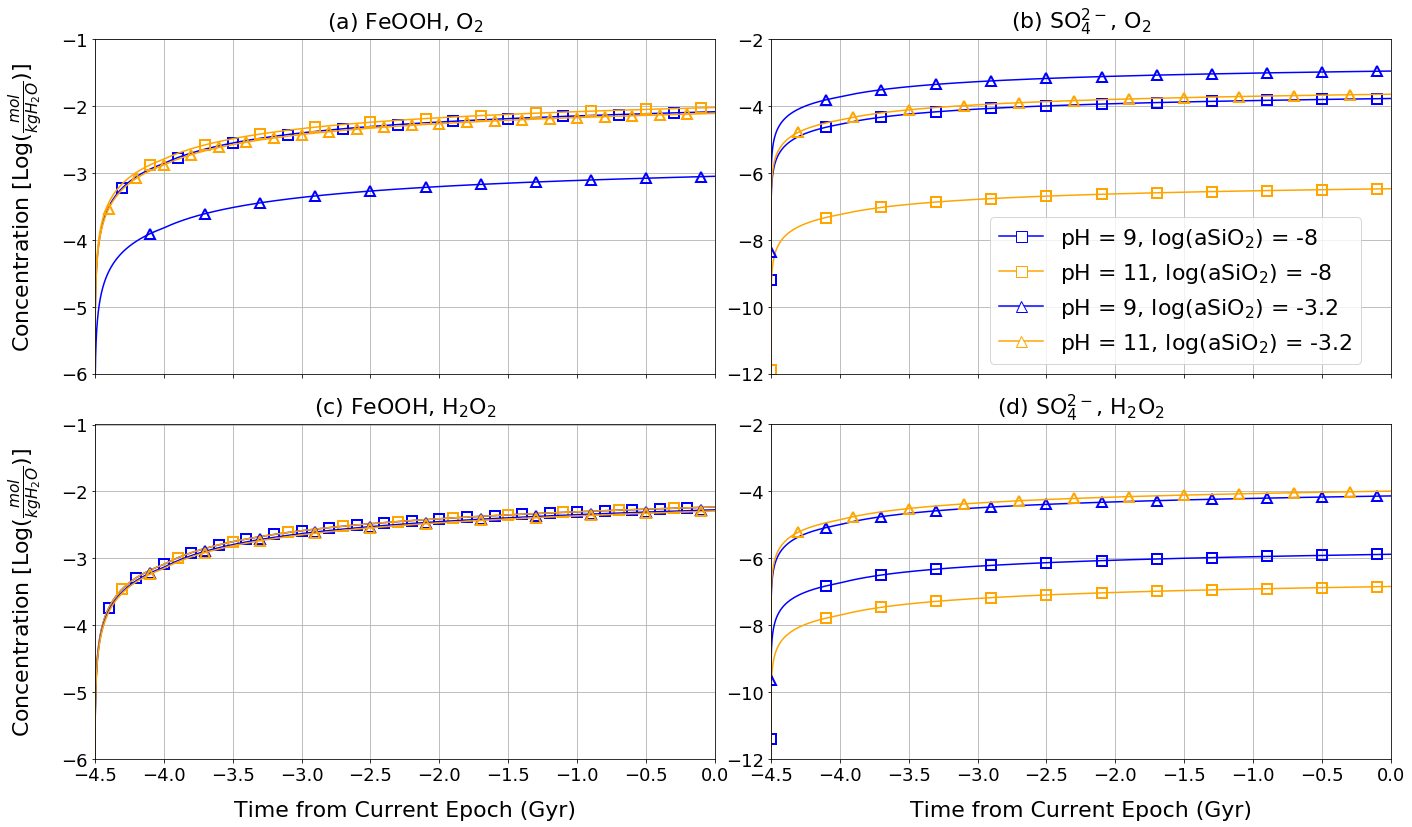

In [40]:
#Old Enceladus:

legend_elements = [Line2D([0], [0], marker='s', color='b', label='pH = 9, log(aSiO$_2$) = -8',
                          markerfacecolor='w', markersize=11),
                   Line2D([0], [0], marker='s', color='orange', label='pH = 11, log(aSiO$_2$) = -8',
                          markerfacecolor='w', markersize=11),
                   Line2D([0], [0], marker='^', color='b', label='pH = 9, log(aSiO$_2$) = -3.2',
                          markerfacecolor='w', markersize=11),
                   Line2D([0], [0], marker='^', color='orange', label='pH = 11, log(aSiO$_2$) = -3.2',
                          markerfacecolor='w', markersize=11)]
                   
plt.rcParams['axes.titlepad'] = 10 

#marker offsets:
even_marks = np.arange(0,460000,40000).tolist()
odd_marks = np.arange(20000,450000,40000).tolist()
mid_marks = np.arange(10000,450000,20000).tolist()

fig15 = plt.figure(15)
ax = plt.subplot(221) 
plt.plot(t_SSplot[1:], np.log10(FeO_conc1[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'b')#color = '#ff7f0e') #FeOOH, pH = 9, log(aSiO$_2$) = -8
plt.plot(t_SSplot[1:], np.log10(FeO_conc1[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'orange')#color = '#1f77b4') #FeOOH, pH = 11, log(aSiO$_2$) = -8
plt.plot(t_SSplot[1:], np.log10(FeO_conc1[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #FeOOH, pH = 9, log(aSiO$_2$) = -3
plt.plot(t_SSplot[1:], np.log10(FeO_conc1[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = mid_marks,  color = 'orange') #FeOOH, pH = 11, log(aSiO$_2$) = -3'
#plt.xlabel('Time from Current Epoch (Gyr)')
plt.setp(ax.get_xticklabels(), visible=False)
plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]', fontsize = 22)
plt.title("(a) FeOOH, O$_2$", fontsize = 22)
plt.xlim(-4.5, 0.0)
plt.ylim(-6, -0.99)
plt.grid()

ax = plt.subplot(222) 
plt.plot(t_SSplot[1:], np.log10(SO4_conc1[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b')#color = '#ff7f0e') #SO$_4^{2-}$, pH = 9, log(aSiO$_2$) = -8
plt.plot(t_SSplot[1:], np.log10(SO4_conc1[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'orange')#color = '#1f77b4') #SO4, pH = 11, log(aSiO$_2$) = -8'
plt.plot(t_SSplot[1:], np.log10(SO4_conc1[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #SO4, pH = 9, log(aSiO$_2$) = -3'
plt.plot(t_SSplot[1:], np.log10(SO4_conc1[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'orange') #SO4, pH = 11, log(aSiO$_2$) = -3'
#plt.xlabel('Time from Current Epoch (Gyr)')
#plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
plt.setp(ax.get_xticklabels(), visible=False)
#plt.setp(ax.get_yticklabels(), visible=False)
plt.xlim(-4.5, 0.0)
plt.ylim(-12, -2)
plt.title("(b) SO$_4^{2-}$, O$_2$", fontsize = 22)
plt.grid()
plt.legend(bbox_to_anchor=(0.97,0.5),prop={'size': 22}, handles=legend_elements,)

ax = plt.subplot(223) 
plt.plot(t_SSplot[1:], np.log10(FeO_conc2[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = mid_marks, color = 'b')#color = '#ff7f0e') #FeOOH, pH = 9, log(aSiO$_2$) = -8
plt.plot(t_SSplot[1:], np.log10(FeO_conc2[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'orange')#color = '#1f77b4') #FeOOH, pH = 11, log(aSiO$_2$) = -8
plt.plot(t_SSplot[1:], np.log10(FeO_conc2[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #FeOOH, pH = 9, log(aSiO$_2$) = -3
plt.plot(t_SSplot[1:], np.log10(FeO_conc2[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks,  color = 'orange') #FeOOH, pH = 11, log(aSiO$_2$) = -3'
plt.xlabel('Time from Current Epoch (Gyr)', fontsize = 22)
plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]', fontsize = 22)
plt.title('(c) FeOOH, H$_2$O$_2$',fontsize=22)
plt.xlim(-4.5, 0.0)
plt.ylim(-6, -0.99)
plt.grid()

ax = plt.subplot(224) 
plt.plot(t_SSplot[1:], np.log10(SO4_conc2[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b')#color = '#ff7f0e') #SO$_4^{2-}$, pH = 9, log(aSiO$_2$) = -8
plt.plot(t_SSplot[1:], np.log10(SO4_conc2[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'orange')#color = '#1f77b4') #SO4, pH = 11, log(aSiO$_2$) = -8'
plt.plot(t_SSplot[1:], np.log10(SO4_conc2[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #SO4, pH = 9, log(aSiO$_2$) = -3'
plt.plot(t_SSplot[1:], np.log10(SO4_conc2[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'orange') #SO4, pH = 11, log(aSiO$_2$) = -3'
plt.xlabel('Time from Current Epoch (Gyr)', fontsize = 22)
#plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
#plt.setp(ax.get_yticklabels(), visible=False)
plt.title('(d) SO$_4^{2-}$, H$_2$O$_2$',fontsize=22)
plt.xlim(-4.5, 0.0)
plt.ylim(-12, -2)
plt.grid()

plt.subplots_adjust(left = 1.0, bottom=1, right=4.0, top=3.5,
                 wspace=0.09, hspace=0.15)
#plt.savefig('Oxidants_H2O2.png')
plt.savefig('all_oxidants.png', bbox_inches = 'tight')
plt.show()



In [41]:
#Young Enceladus:

# legend_elements = [Line2D([0], [0], marker='s', color='b', label='pH = 9, log(aSiO$_2$) = -8',
#                           markerfacecolor='w', markersize=11),
#                    Line2D([0], [0], marker='s', color='orange', label='pH = 11, log(aSiO$_2$) = -8',
#                           markerfacecolor='w', markersize=11),
#                    Line2D([0], [0], marker='^', color='b', label='pH = 9, log(aSiO$_2$) = -3.2',
#                           markerfacecolor='w', markersize=11),
#                    Line2D([0], [0], marker='^', color='orange', label='pH = 11, log(aSiO$_2$) = -3.2',
#                           markerfacecolor='w', markersize=11)]
                   
# plt.rcParams['axes.titlepad'] = 10 

# #marker offsets:
# even_marks = np.arange(0,100000,8000).tolist()
# odd_marks = np.arange(4000,100000,8000).tolist()
# mid_marks = np.arange(2000,100000,4000).tolist()

# fig15 = plt.figure(15)
# ax = plt.subplot(221) 
# plt.plot(t_SSplot[1:], np.log10(FeO_conc1[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'b')#color = '#ff7f0e') #FeOOH, pH = 9, log(aSiO$_2$) = -8
# plt.plot(t_SSplot[1:], np.log10(FeO_conc1[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'orange')#color = '#1f77b4') #FeOOH, pH = 11, log(aSiO$_2$) = -8
# plt.plot(t_SSplot[1:], np.log10(FeO_conc1[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #FeOOH, pH = 9, log(aSiO$_2$) = -3
# plt.plot(t_SSplot[1:], np.log10(FeO_conc1[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = mid_marks,  color = 'orange') #FeOOH, pH = 11, log(aSiO$_2$) = -3'
# #plt.xlabel('Time from Current Epoch (Gyr)')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]', fontsize = 22)
# plt.title("(a) FeOOH, O$_2$", fontsize = 22)
# plt.legend(bbox_to_anchor=(0.95,0.5),prop={'size': 22}, handles=legend_elements,)
# plt.xlim(-100, 0.0)
# plt.ylim(-9, -3)
# plt.grid()

# ax = plt.subplot(222) 
# plt.plot(t_SSplot[1:], np.log10(SO4_conc1[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b')#color = '#ff7f0e') #SO$_4^{2-}$, pH = 9, log(aSiO$_2$) = -8
# plt.plot(t_SSplot[1:], np.log10(SO4_conc1[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'orange')#color = '#1f77b4') #SO4, pH = 11, log(aSiO$_2$) = -8'
# plt.plot(t_SSplot[1:], np.log10(SO4_conc1[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #SO4, pH = 9, log(aSiO$_2$) = -3'
# plt.plot(t_SSplot[1:], np.log10(SO4_conc1[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'orange') #SO4, pH = 11, log(aSiO$_2$) = -3'
# #plt.xlabel('Time from Current Epoch (Gyr)')
# #plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
# plt.setp(ax.get_xticklabels(), visible=False)
# #plt.setp(ax.get_yticklabels(), visible=False)
# plt.xlim(-100, 0.0)
# plt.ylim(-14, -4)
# plt.title("(b) SO$_4^{2-}$, O$_2$", fontsize = 22)
# plt.grid()

# ax = plt.subplot(223) 
# plt.plot(t_SSplot[1:], np.log10(FeO_conc2[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = mid_marks, color = 'b')#color = '#ff7f0e') #FeOOH, pH = 9, log(aSiO$_2$) = -8
# plt.plot(t_SSplot[1:], np.log10(FeO_conc2[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'orange')#color = '#1f77b4') #FeOOH, pH = 11, log(aSiO$_2$) = -8
# plt.plot(t_SSplot[1:], np.log10(FeO_conc2[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #FeOOH, pH = 9, log(aSiO$_2$) = -3
# plt.plot(t_SSplot[1:], np.log10(FeO_conc2[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks,  color = 'orange') #FeOOH, pH = 11, log(aSiO$_2$) = -3'
# plt.xlabel('Time from Current Epoch (Myr)', fontsize = 22)
# plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]', fontsize = 22)
# plt.title('(c) FeOOH, H$_2$O$_2$',fontsize=22)
# plt.xlim(-100, 0.0)
# plt.ylim(-9, -3)
# plt.grid()

# ax = plt.subplot(224) 
# plt.plot(t_SSplot[1:], np.log10(SO4_conc2[0,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b')#color = '#ff7f0e') #SO$_4^{2-}$, pH = 9, log(aSiO$_2$) = -8
# plt.plot(t_SSplot[1:], np.log10(SO4_conc2[2,1:]), marker = 's', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'orange')#color = '#1f77b4') #SO4, pH = 11, log(aSiO$_2$) = -8'
# plt.plot(t_SSplot[1:], np.log10(SO4_conc2[1,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = even_marks, color = 'b') #SO4, pH = 9, log(aSiO$_2$) = -3'
# plt.plot(t_SSplot[1:], np.log10(SO4_conc2[3,1:]), marker = '^', fillstyle = 'none', markersize = '10', markeredgewidth = 2, markevery = odd_marks, color = 'orange') #SO4, pH = 11, log(aSiO$_2$) = -3'
# plt.xlabel('Time from Current Epoch (Myr)', fontsize = 22)
# #plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
# #plt.setp(ax.get_yticklabels(), visible=False)
# plt.title('(d) SO$_4^{2-}$, H$_2$O$_2$',fontsize=22)
# plt.xlim(-100, 0.0)
# plt.ylim(-14, -4)
# plt.grid()

# plt.subplots_adjust(left = 1.0, bottom=1, right=4.0, top=3.5,
#                  wspace=0.09, hspace=0.15)
# plt.savefig('./Young Enceladus/YoungEnceladus_all_oxidants.png', bbox_inches = 'tight')

# plt.show()

In [42]:
len(t_SSplot)

450001

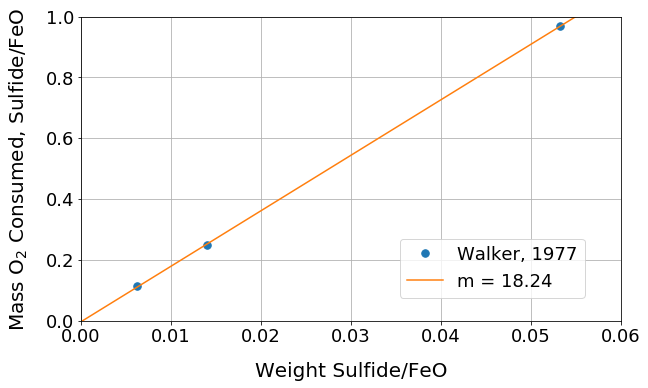

In [43]:
#Scenario 2: assume all Fe and S is present in minerals -Walker
weight_S = np.array([0.15, 0.04, 0.03]) #sedimentary, granatic, basaltic - weight %
weight_FeO = np.array([2.82, 2.86, 4.78])
O2_S = np.array([0.3,0.08,0.06]) #grams O2
O2_FeO = np.array([0.31, 0.32, 0.53])

weight_ratios = weight_S/weight_FeO
O2_ratios = O2_S/O2_FeO


#Other book:
weight2_S = 0.3 #percent
weight2_FeO = 1.9
O2_S2 = 3.5
O2_FeO2 = 1.3

#Fit with a line
m,b = np.polyfit(weight_ratios, O2_ratios, 1)
x = np.arange(0.0,0.1,0.01)
y = m*x + b

fig16 = plt.figure(16)
fig16.set_figheight(6.5)
fig16.set_figwidth(10)
plt.clf()
plt.plot(weight_ratios, O2_ratios, '.', markersize = 15, label = 'Walker, 1977')
plt.plot(x,y,'-', label = 'm = %2.2f' %m)
plt.xlabel('Weight Sulfide/FeO')
plt.ylabel('Mass O$_2$ Consumed, Sulfide/FeO')
plt.xlim(0.0, 0.06)
plt.ylim(0,1)
#plt.title(r"FeOOH and SO$_4^{2-}$ Concentration")
plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
plt.grid()
plt.legend(bbox_to_anchor=(0.95,0.3), prop={'size': 18})
plt.savefig('Mineral_Rates.png')

In [44]:

#Let's try and get iron mineral vs sulfur mineral abundances
M_S = 32.06 #g/mol
M_FeO = 71.85

M_coreR = 6.26e19 #kg
M_coreO = 6.25e19

#Molar masses:
#Iron Minerals:
M_Gre = 371.74 #g/mol Greenalite Fe3Si2O5(OH)4
M_Mag = 231.55 #Magnetite Fe3O4

#Sulfur Minerals:
M_Po = 80.94 #Pyrrhotite Fe0.875S

#Reduced hydrous rock
N_Gre = 0.2975*M_coreR/(M_Gre/1000) #mol Gre
N_PoR = 0.1927*M_coreR/(M_Po/1000)

#Oxidized hydrous rock
N_Mag = 0.1911*M_coreO/(M_Mag/1000)
N_PoO = 0.1987*M_coreO/(M_Po/1000)


r_FeS = m #x faster than consumption of O2 by FeO, for mass S vs. mass FeO
r_PoR = r_FeS *(M_S/M_FeO)*(1/3) # x faster than consumption of O2 by Gre/Mag, for mol Po/mol Gre or Mag
r_PoO = r_FeS *(M_S/M_FeO)

#r_FeS = 1.9/0.6 #from Chris - weight % weathering, FeS2 vs FeO? - need content %
#but we have 3FeO's per Mag/Gre, and 3x more FeS than FeO
f_PR = (r_PoR * (N_PoR/N_Gre))/(1+(r_PoR * (N_PoR/N_Gre)))
f_PO = (r_PoO * (N_PoO/N_Mag))/(1+(r_PoO * (N_PoO/N_Mag)))
f_Gre = 1 - f_PR
f_Mag = 1 - f_PO

#Reactions:
# 8 Fe0.875S + 11.5 H2O + 17.25 O2 = 16 H+ + 8 SO42- + 7FeOOH >>> 1 O2 per 0.405 FeOOH, 0.464 So4
# 4Gre +3 O2 = 12 FeOOH + 8 SiO2 + 2 H2O >>>4 FeOOH per O2
# 4Mag + 6H2O + O2 = 12 FeOOH>>> 12 FeOOH per O2

#RHR:
FeOOH_R1 = (f_Gre*O_total*4 + f_PR*O_total*(7/17.25))
print((FeOOH_R1[-1]/M_ocean)*1000)
SO4_R1 = f_PR*O_total*(8/17.25)
print((SO4_R1[-1]/M_ocean)*1000)

#OHR:
FeOOH_O1 = (f_Mag*O_total*12) + (f_PO*O_total*(7/17.25))
print((FeOOH_O1[-1]/M_ocean)*1000)
SO4_O1 = f_PO*O_total*(8/17.25)
print((SO4_O1[-1]/M_ocean)*1000)

#Peroxide Reactions:
# 2Gre + 3H2O2 = 4SiO2 + 4H2O + 6FeOOH >>> 2 FeOOH per H2O2
# 2Mag + H2O2 + 2H2O = 6FeOOH >>> 6 FeOOH per H2O2
# 8Po + 34.5 H2O2 = 8SO4 + 7FeOOH + 16H+ + 23 H2O >> (7/34.5)FeOOH, (8/34.5)SO4 per H2O2

#RHR:
FeOOH_R2 = (f_Gre*O_total*2) + (f_PR*O_total*(7/34.5))
print((FeOOH_R2[-1]/M_ocean)*1000)
SO4_R2 = f_PR*O_total*(8/34.5)
print((SO4_R2[-1]/M_ocean)*1000)

#OHR:
FeOOH_O2 = (f_Mag*O_total*6) + (f_PO*O_total*(7/34.5))
print((FeOOH_O2[-1]/M_ocean)*1000)
SO4_O2 = f_PO*O_total*(8/34.5)
print((SO4_O2[-1]/M_ocean)*1000)


2.0077476221601898
1.0331038057981816
2.167110490743736
1.1150318344217822
1.0038738110800949
0.5165519028990908
1.083555245371868
0.5575159172108911


In [45]:
m

18.24456485060175

In [46]:
#Now we need to calculate production rates 
#We have the O2 production rate through time

#O2:
#RHR
rR1_FeOOH = ((3/0.75)*f_Gre*rO2_total) + ((7/17.25)*f_PR*rO2_total)
rR1_SO4 = f_PR*rO2_total*(8/17.25)
#OHR:
rO1_FeOOH = (f_Mag*rO2_total*12) + (f_PO*rO2_total*(7/17.25))
rO1_SO4 = f_PO*rO2_total*(8/17.25)

#H2O2:
#RHR
rR2_FeOOH = (f_Gre*rO2_total*2) + (f_PR*rO2_total*(7/34.5))
rR2_SO4 = f_PR*rO2_total*(8/34.5)
#OHR:
rO2_FeOOH = (f_Mag*rO2_total*6) + (f_PO*rO2_total*(7/34.5))
rO2_SO4 = f_PO*rO2_total*(8/34.5)

In [47]:
print(f_Gre)
print(f_Mag)
print(f_PR)
print(f_PO)

0.11022054050101404
0.03965853442050837
0.889779459498986
0.9603414655794916


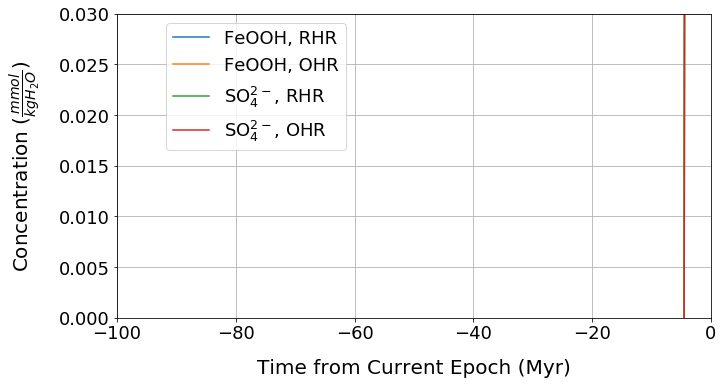

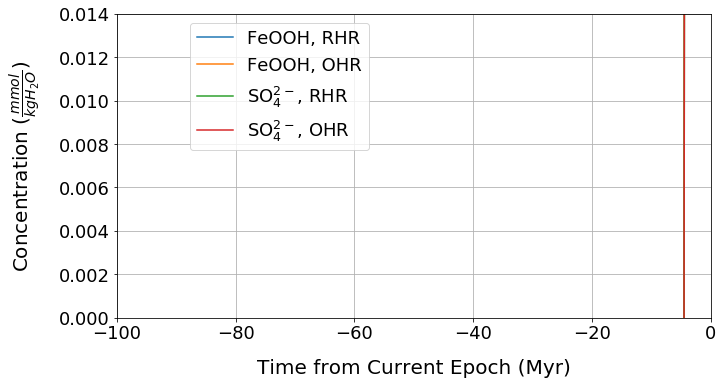

In [48]:
#ALRIGHT let's plot this

#Old Enceladus:
# marks = np.arange(0,4501,200).tolist()
# fig17 = plt.figure(17)
# fig17.set_figheight(6.5)
# fig17.set_figwidth(11)
# plt.clf()
# plt.plot(t_plot, (FeOOH_R1/M_ocean)*1000, label = 'FeOOH, RHR')
# plt.plot(t_plot, (FeOOH_O1/M_ocean)*1000, label = 'FeOOH, OHR')
# plt.plot(t_plot, (SO4_R1/M_ocean)*1000, label = 'SO$_4^{2-}$, RHR')
# plt.plot(t_plot, (SO4_O1/M_ocean)*1000, label = 'SO$_4^{2-}$, OHR')
# plt.xlabel('Time from Current Epoch (Gyr)')
# plt.ylabel(r'Concentration ($\frac{mmol}{kg H_{2}O}$)')
# plt.xlim(-4.5, 0.0)
# plt.ylim(0,2.5)
# #plt.title(r"FeOOH and SO$_4^{2-}$ Concentration")
# plt.legend(bbox_to_anchor=(0.4,1.1), prop={'size': 18})
# plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
# plt.grid()
# #plt.yscale('log')
# plt.savefig('O2Oxidants_Minerals.png')

# fig18 = plt.figure(18)
# fig18.set_figheight(6.5)
# fig18.set_figwidth(11)
# plt.clf()
# plt.plot(t_plot, (FeOOH_R2/M_ocean)*1000, label = 'FeOOH, RHR')
# plt.plot(t_plot, (FeOOH_O2/M_ocean)*1000, label = 'FeOOH, OHR')
# plt.plot(t_plot, (SO4_R2/M_ocean)*1000, label = 'SO$_4^{2-}$, RHR')
# plt.plot(t_plot, (SO4_O2/M_ocean)*1000, label = 'SO$_4^{2-}$, OHR')
# plt.xlabel('Time from Current Epoch (Gyr)')
# plt.ylabel(r'Concentration ($\frac{mmol}{kg H_{2}O}$)')
# plt.xlim(-4.5, 0.0)
# plt.ylim(0,1.2)
# #plt.title(r"Total O$_{2}$ Concentration in the Ocean")
# plt.legend(bbox_to_anchor=(0.44,1.1), prop={'size': 18})
# plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
# plt.grid()
# plt.savefig('H2O2Oxidants_Minerals.png')

#Young Enceladus:
marks = np.arange(0,4501,200).tolist()
fig17 = plt.figure(17)
fig17.set_figheight(6.5)
fig17.set_figwidth(11)
plt.clf()
plt.plot(t_plot, (FeOOH_R1/M_ocean)*1000, label = 'FeOOH, RHR')
plt.plot(t_plot, (FeOOH_O1/M_ocean)*1000, label = 'FeOOH, OHR')
plt.plot(t_plot, (SO4_R1/M_ocean)*1000, label = 'SO$_4^{2-}$, RHR')
plt.plot(t_plot, (SO4_O1/M_ocean)*1000, label = 'SO$_4^{2-}$, OHR')
plt.xlabel('Time from Current Epoch (Myr)')
plt.ylabel(r'Concentration ($\frac{mmol}{kg H_{2}O}$)')
plt.xlim(-100, 0.0)
plt.ylim(0,0.03)
#plt.title(r"FeOOH and SO$_4^{2-}$ Concentration")
plt.legend(bbox_to_anchor=(0.4,1), prop={'size': 18})
plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.yscale('log')
plt.savefig('./Young Enceladus/YoungEnceladus_O2Oxidants_Minerals.png')

fig18 = plt.figure(18)
fig18.set_figheight(6.5)
fig18.set_figwidth(11)
plt.clf()
plt.plot(t_plot, (FeOOH_R2/M_ocean)*1000, label = 'FeOOH, RHR')
plt.plot(t_plot, (FeOOH_O2/M_ocean)*1000, label = 'FeOOH, OHR')
plt.plot(t_plot, (SO4_R2/M_ocean)*1000, label = 'SO$_4^{2-}$, RHR')
plt.plot(t_plot, (SO4_O2/M_ocean)*1000, label = 'SO$_4^{2-}$, OHR')
plt.xlabel('Time from Current Epoch (Myr)')
plt.ylabel(r'Concentration ($\frac{mmol}{kg H_{2}O}$)')
plt.xlim(-100, 0.0)
plt.ylim(0,0.014)
#plt.title(r"Total O$_{2}$ Concentration in the Ocean")
plt.legend(bbox_to_anchor=(0.44,1), prop={'size': 18})
plt.subplots_adjust(left=0.15, right=0.9, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('./Young Enceladus/YoungEnceladus_H2O2Oxidants_Minerals.png')

In [49]:
print((SO4_R1[-1])*1000/M_ocean)
print((SO4_O1[-1])*1000/M_ocean)
print((SO4_R2[-1])*1000/M_ocean)
print((SO4_O2[-1])*1000/M_ocean)

print((FeOOH_R1[-1])*1000/M_ocean)
print((FeOOH_O1[-1])*1000/M_ocean)
print((FeOOH_R2[-1])*1000/M_ocean)
print((FeOOH_O2[-1])*1000/M_ocean)

1.0331038057981816
1.1150318344217822
0.5165519028990908
0.5575159172108911
2.00774762216019
2.1671104907437355
1.003873811080095
1.0835552453718678


In [50]:
#Write final oxidant production rates & concentrations to file
#Print to file

#Old Enceladus:
fmt = lambda x : "%.04e" % x #+ str(x%1)[0:5]

f = open('Oxidants.txt', 'w')
f.write('Limiting Case I - No Reductants:\n')
f.write('       Concentration    Production Rate\n')
f.write('O2     '+ fmt(O_total[-1]/M_ocean) + '       ' + fmt(rO2_total[-1]) + ' \n')
f.write('H2O2   '+ fmt(P_total[-1]/M_ocean) + '       ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('Aqueous Case, O2: pH = 9 \n')
f.write('       Concentration    Production Rate    Concentration     Production Rate\n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('O2     '+ fmt(SS_O2[0,-1]) + '        ' + fmt(rO2_total[-1]) +'        '+ fmt(SS_O2[1,-1]) + '   ' + fmt(rO2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc1[0,-1]) + '        ' + fmt(dSO4_dt1[0,-1]*M_ocean) +'        '+ fmt(SO4_conc1[1,-1]) + '   ' + fmt(dSO4_dt1[1,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc1[0,-1]) + '        ' + fmt(dFeO_dt1[0,-1]*M_ocean) +'        '+ fmt(FeO_conc1[1,-1]*M_ocean) + '   ' + fmt(dFeO_dt1[1,-1]*M_ocean) + ' \n')
f.write('Aqueous Case, O2: pH = 11 \n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('O2     '+ fmt(SS_O2[2,-1]) + '        ' + fmt(rO2_total[-1]) +'        '+ fmt(SS_O2[3,-1]) + '   ' + fmt(rO2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc1[2,-1]) + '        ' + fmt(dSO4_dt1[2,-1]*M_ocean) +'        '+ fmt(SO4_conc1[3,-1]) + '   ' + fmt(dSO4_dt1[3,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc1[2,-1]) + '        ' + fmt(dFeO_dt1[2,-1]*M_ocean) +'        '+ fmt(FeO_conc1[3,-1]) + '   ' + fmt(dFeO_dt1[3,-1]*M_ocean) + ' \n')
f.write('Aqueous Case, H2O2: pH = 9 \n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('H2O2   '+ fmt(SS_H2O2[0,-1]) + '        ' + fmt(rH2O2_total[-1]) +'        '+ fmt(SS_H2O2[1,-1]) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc2[0,-1]) + '        ' + fmt(dSO4_dt2[0,-1]*M_ocean) +'        '+ fmt(SO4_conc2[1,-1]) + '   ' + fmt(dSO4_dt2[1,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc2[0,-1]) + '        ' + fmt(dFeO_dt2[0,-1]*M_ocean) +'        '+ fmt(FeO_conc2[1,-1]) + '   ' + fmt(dFeO_dt2[1,-1]*M_ocean) + ' \n')
f.write('Aqueous Case, H2O2: pH = 11 \n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('H2O2   '+ fmt(SS_H2O2[2,-1]) + '        ' + fmt(rH2O2_total[-1]) +'        '+ fmt(SS_H2O2[3,-1]) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc2[2,-1]) + '        ' + fmt(dSO4_dt2[2,-1]*M_ocean) +'        '+ fmt(SO4_conc2[3,-1]) + '   ' + fmt(dSO4_dt2[3,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc2[2,-1]) + '        ' + fmt(dFeO_dt2[2,-1]*M_ocean) +'        '+ fmt(FeO_conc2[3,-1]) + '   ' + fmt(dFeO_dt2[3,-1]*M_ocean) + ' \n')
f.write('Mineral Case, O2:\n')
f.write('       RHR                                 OHR\n')
f.write('O2     '+ fmt(0)+ '       ' + fmt(rH2O2_total[-1]) +'         '+ fmt(0) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_R1[-1]/M_ocean)+ '       ' + fmt(rR1_SO4[-1]) +'         '+ fmt(SO4_O1[-1]/M_ocean) + '   ' + fmt(rO1_SO4[-1]) + ' \n')
f.write('FeOOH  '+ fmt(FeOOH_R1[-1]/M_ocean)+ '       ' + fmt(rR1_FeOOH[-1]) +'         '+ fmt(FeOOH_O1[-1]/M_ocean) + '   ' + fmt(rO1_FeOOH[-1]) + ' \n')
f.write('Mineral Case, H2O2:\n')
f.write('H2O2   '+ fmt(0)+ '       ' + fmt(rH2O2_total[-1]) +'         '+ fmt(0) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_R2[-1]/M_ocean)+ '       ' + fmt(rR2_SO4[-1]) +'         '+ fmt(SO4_O2[-1]/M_ocean) + '   ' + fmt(rO2_SO4[-1]) + ' \n')
f.write('FeOOH  '+ fmt(FeOOH_R2[-1]/M_ocean)+ '       ' + fmt(rR2_FeOOH[-1]) +'         '+ fmt(FeOOH_O2[-1]/M_ocean) + '   ' + fmt(rO2_FeOOH[-1]) + ' \n')
f.write('  \n')
f.close()



In [51]:
##Write final oxidant production rates & concentrations to file
#Print to file

#Young Enceldaus
fmt = lambda x : "%.04e" % x #+ str(x%1)[0:5]

f = open('YoungEnceladus_Oxidants.txt', 'w')
f.write('Limiting Case I - No Reductants:\n')
f.write('       Concentration    Production Rate\n')
f.write('O2     '+ fmt(O_total[-1]/M_ocean) + '       ' + fmt(rO2_total[-1]) + ' \n')
f.write('H2O2   '+ fmt(P_total[-1]/M_ocean) + '       ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('Aqueous Case, O2: pH = 9 \n')
f.write('       Concentration    Production Rate    Concentration     Production Rate\n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('O2     '+ fmt(SS_O2[0,-1]) + '        ' + fmt(rO2_total[-1]) +'        '+ fmt(SS_O2[1,-1]) + '   ' + fmt(rO2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc1[0,-1]) + '        ' + fmt(dSO4_dt1[0,-1]*M_ocean) +'        '+ fmt(SO4_conc1[1,-1]) + '   ' + fmt(dSO4_dt1[1,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc1[0,-1]) + '        ' + fmt(dFeO_dt1[0,-1]*M_ocean) +'        '+ fmt(FeO_conc1[1,-1]*M_ocean) + '   ' + fmt(dFeO_dt1[1,-1]*M_ocean) + ' \n')
f.write('Aqueous Case, O2: pH = 11 \n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('O2     '+ fmt(SS_O2[2,-1]) + '        ' + fmt(rO2_total[-1]) +'        '+ fmt(SS_O2[3,-1]) + '   ' + fmt(rO2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc1[2,-1]) + '        ' + fmt(dSO4_dt1[2,-1]*M_ocean) +'        '+ fmt(SO4_conc1[3,-1]) + '   ' + fmt(dSO4_dt1[3,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc1[2,-1]) + '        ' + fmt(dFeO_dt1[2,-1]*M_ocean) +'        '+ fmt(FeO_conc1[3,-1]) + '   ' + fmt(dFeO_dt1[3,-1]*M_ocean) + ' \n')
f.write('Aqueous Case, H2O2: pH = 9 \n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('H2O2   '+ fmt(SS_H2O2[0,-1]) + '        ' + fmt(rH2O2_total[-1]) +'        '+ fmt(SS_H2O2[1,-1]) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc2[0,-1]) + '        ' + fmt(dSO4_dt2[0,-1]*M_ocean) +'        '+ fmt(SO4_conc2[1,-1]) + '   ' + fmt(dSO4_dt2[1,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc2[0,-1]) + '        ' + fmt(dFeO_dt2[0,-1]*M_ocean) +'        '+ fmt(FeO_conc2[1,-1]) + '   ' + fmt(dFeO_dt2[1,-1]*M_ocean) + ' \n')
f.write('Aqueous Case, H2O2: pH = 11 \n')
f.write('       log(aSiO2) = -8                     log(aSiO2) = 3\n')
f.write('H2O2   '+ fmt(SS_H2O2[2,-1]) + '        ' + fmt(rH2O2_total[-1]) +'        '+ fmt(SS_H2O2[3,-1]) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_conc2[2,-1]) + '        ' + fmt(dSO4_dt2[2,-1]*M_ocean) +'        '+ fmt(SO4_conc2[3,-1]) + '   ' + fmt(dSO4_dt2[3,-1]*M_ocean) + ' \n')
f.write('FeOOH  '+ fmt(FeO_conc2[2,-1]) + '        ' + fmt(dFeO_dt2[2,-1]*M_ocean) +'        '+ fmt(FeO_conc2[3,-1]) + '   ' + fmt(dFeO_dt2[3,-1]*M_ocean) + ' \n')
f.write('Mineral Case, O2:\n')
f.write('       RHR                                 OHR\n')
f.write('O2     '+ fmt(0)+ '       ' + fmt(rH2O2_total[-1]) +'         '+ fmt(0) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_R1[-1]/M_ocean)+ '       ' + fmt(rR1_SO4[-1]) +'         '+ fmt(SO4_O1[-1]/M_ocean) + '   ' + fmt(rO1_SO4[-1]) + ' \n')
f.write('FeOOH  '+ fmt(FeOOH_R1[-1]/M_ocean)+ '       ' + fmt(rR1_FeOOH[-1]) +'         '+ fmt(FeOOH_O1[-1]/M_ocean) + '   ' + fmt(rO1_FeOOH[-1]) + ' \n')
f.write('Mineral Case, H2O2:\n')
f.write('H2O2   '+ fmt(0)+ '       ' + fmt(rH2O2_total[-1]) +'         '+ fmt(0) + '   ' + fmt(rH2O2_total[-1]) + ' \n')
f.write('SO4    '+ fmt(SO4_R2[-1]/M_ocean)+ '       ' + fmt(rR2_SO4[-1]) +'         '+ fmt(SO4_O2[-1]/M_ocean) + '   ' + fmt(rO2_SO4[-1]) + ' \n')
f.write('FeOOH  '+ fmt(FeOOH_R2[-1]/M_ocean)+ '       ' + fmt(rR2_FeOOH[-1]) +'         '+ fmt(FeOOH_O2[-1]/M_ocean) + '   ' + fmt(rO2_FeOOH[-1]) + ' \n')
f.write('  \n')
f.close()

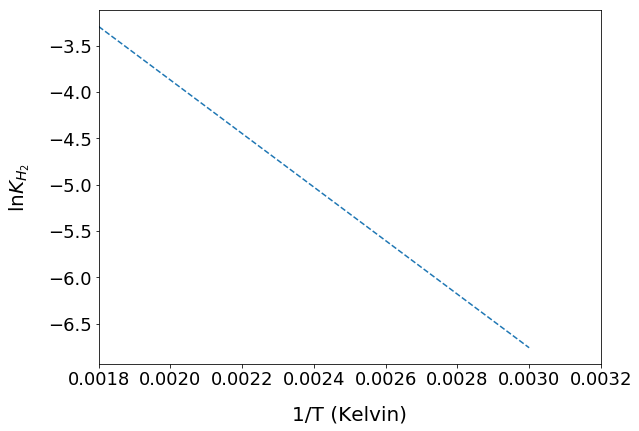

In [52]:
#Testing some things to address reviewer comments

#H2 + O2 back reaction kinetics:
#From Foustoukos (2010):
A = 6.7 #s^-1
E_a = 24 *1000 #kJ/mol -> J/mol
R = 8.3145 #J/mol K
T = np.array([273.15, (1/(1.8e-3)), (1/(2.1e-3)), (1/(2.4e-3)), (1/(2.7e-3)), (1/(3.0e-3))])

def k(T):
    k = A*np.exp(-E_a/(R*T))
    return k

fig18 = plt.figure(18)
fig18.set_figheight(6.5)
fig18.set_figwidth(9)
plt.ticklabel_format(style = 'sci', axis = 'x', )
plt.clf()
plt.plot((1/T[1:]), np.log(k(T[1:])), '--')
plt.xlabel('1/T (Kelvin)')
plt.ylabel('ln$K_{H_2}$')
plt.xlim(1.8e-3, 3.2e-3)
#plt.ylim(-11,-7)
#plt.title(r"FeOOH and SO$_4^{2-}$ Concentration")
#plt.yscale('log')
plt.savefig('O2H2Kinetics.png')


In [53]:
#Calculate half-life of H2O2 with no H2p present
T = np.array([60,90,120,150,180,200])
k_noH2 = np.array([5.77e-5, 2.48e-4, 1.43e-3, 2.11e-3, 4.29e-5, 5.51e-3])
thalf_noH2 = (0.693/k_noH2)/60 #in minutes

thalf_H2 = np.array([200, 50, 9, 6, 2, 1])

In [54]:
thalf_noH2

array([200.17331023,  46.57258065,   8.07692308,   5.47393365,
       269.23076923,   2.09618875])

In [55]:
T = np.array([55, 125, 200, 250]) + 273
k_calc = k(T)
print(k_calc)
k_act = np.array([2.69e-5, 1.89e-4, 4.11e-4, 5.35e-4])
n = np.log(k_calc/k_act)
x = n + (E_a/(R*T))
print(x)
print((E_a/(R*T)))
print(x/(E_a/(R*T)))
print(1/np.log(2))

[0.00100953 0.00474595 0.01498839 0.02686159]
[12.4254918  10.47587107  9.69902487  9.43535134]
[8.80037666 7.25257172 6.10258677 5.51916547]
[1.41192727 1.44443536 1.5893301  1.70956123]
1.4426950408889634


In [56]:
1/(np.exp(-8))

2980.9579870417283

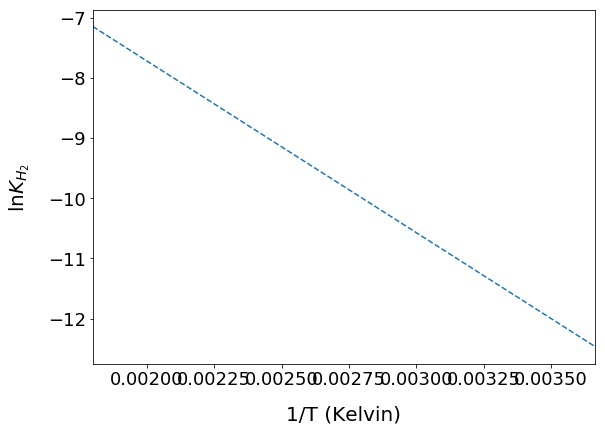

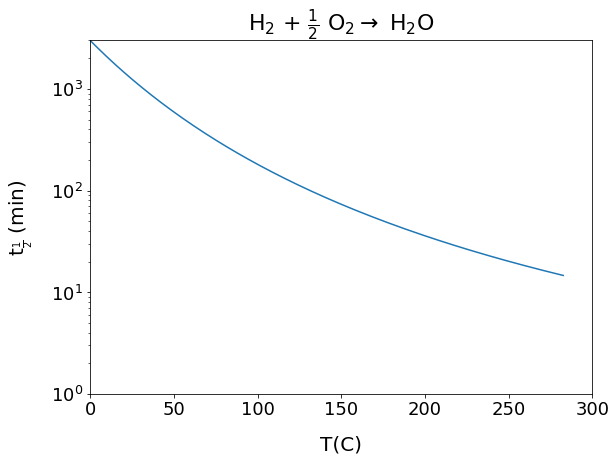

In [57]:
#This still doesn't match the paper so let's try and recreate the line another way...
x = ([2.1e-3,3.15e-3])
y = ([-8,-11])
dydx = (y[1]-y[0])/(x[1]-x[0])
#T_inv = np.arange(1.8e-3,3.3e-3,1.5e-4)
#lnK = dydx*T_inv-2
#that's a good match - now extrapolate down to 0C
T_0 = 1/273
T_step = 1e-5
T_inv = np.arange(1.8e-3,T_0+T_step,T_step)
lnK = dydx*T_inv-2

lnK_ext = lnK[-2]
t_half = (0.693/np.exp(lnK))/60 #seconds to minutes
T_cels = 1/T_inv - 273

fig19 = plt.figure(19)
fig19.set_figheight(6.5)
fig19.set_figwidth(9)
plt.clf()
plt.plot(T_inv, lnK, '--')
plt.xlabel('1/T (Kelvin)')
plt.ylabel('ln$K_{H_2}$')
plt.xlim(1.8e-3, T_0)
plt.ticklabel_format(style = 'sci', axis = 'x', )
#plt.ylim(-11,-7)
#plt.title(r"FeOOH and SO$_4^{2-}$ Concentration")
#plt.yscale('log')
plt.savefig('O2H2Kinetics.png')

fig20 = plt.figure(20)
fig20.set_figheight(6.5)
fig20.set_figwidth(9)
plt.clf()
plt.plot(T_cels, t_half, '-')
plt.xlabel('T(C)')
plt.ylabel(r't$_\frac{1}{2}$ (min)')
plt.yscale('log')
plt.xlim(0,300)
#plt.ticklabel_format(style = 'sci', axis = 'x', )
plt.ylim(1,3000)
plt.title(r"H$_2$ + $\frac{1}{2}$ O$_2 \rightarrow$ H$_2$O")
#plt.yscale('log')
plt.savefig('O2H2halflife.png')


In [58]:
print(T_cels[-34])
lnK[-34]

26.40119760479007


-11.542857142857153

In [59]:
#potential loss term from H2
H2 = np.array([1e-4,2e-7])
Loss_H2 = (0.5*np.exp(lnK[-1])*H2)*3600*24*365 #mol/s
print(Loss_H2)

[5.96073472e-03 1.19214694e-05]


### To verify this, ignore sf for first 1.2 Gyr, then ignore K40 after that
#For first 1.2 Gyr, O2 = O2_del 
#t_K40 = np.arange(0.0, 1.2, 0.00001) * 10**9
#O2_K40 = (C/(B - lambda_K)) * (np.exp(-lambda_K*t_K40) - np.exp(-B*t_K40)) 

#fig11 = plt.figure(11)
#fig11.set_figheight(6.5)
#fig11.set_figwidth(9)
#plt.clf()
#plt.plot(t_K40, O2_K40, 'b-')
#plt.xlabel('Time from Current Epoch (Gyr)')
#plt.ylabel('Concentration (mol/kg $H_{2}O$)')
#plt.xlim(0.0, 1.2 * 10**9)
#plt.ylim(0.02, 0.055)
#plt.title(r"$O_{2}$ Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
#plt.subplots_adjust(left=0.16, right=0.94, top=0.8, bottom=0.15)
#plt.grid()
#plt.savefig('O2_1.2GYr.png') 

In [60]:
3000/60

50.0

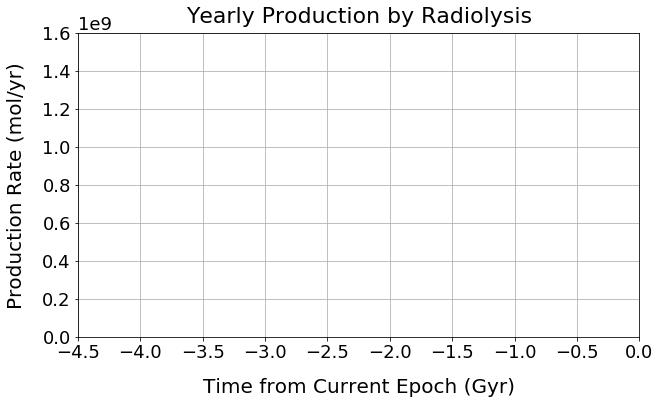

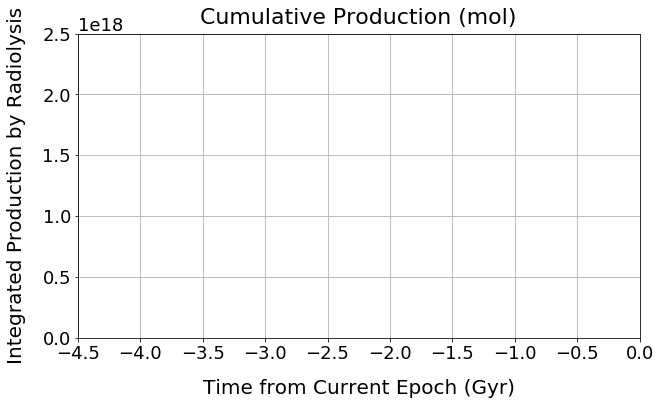

In [61]:
#CORE#

#######Calculate Theoretical Yield of O2 in core from radiolytic model#######
#Constants:
G_alpha = 0.96/100.0 #molecules/eV
G_beta = 0.6/100.0
G_gamma = 0.4/100.0

rho_r = 3.0 #g/cm^3
rho_w = 1.0

s_alpha = 1.5
s_beta = 1.25
s_gamma = 1.14

phi = 0.3 #porosity


#Calculate core volume
R_core = 252.0 - 80.0
V_core = ((4.0/3.0) * np.pi * R_core**3) * (10**5)**3 #cm**3

#Constants needed to calculate activities 

#concentration at current time
conc_K = 105.0/10**9 #grams K/ grams total
conc_Th = 40.0/10**9
conc_U5 = 0.087/10**9
conc_U8 = 12.0/10**9

#convert these to atoms
M_K = 40.0 #g/mole
M_Th = 232.0
M_U5 = 235.0
M_U8 = 238.0

def N(conc, V, rho, M, N_A):
    return (conc * (V * rho)/M) * N_A
    
N_K = N(conc_K, V_core,rho_r, M_K, N_A)
N_Th = N(conc_Th, V_core,rho_r, M_Th, N_A)
N_U5 = N(conc_U5, V_core, rho_r, M_U5, N_A)
N_U8 = N(conc_U8, V_core, rho_r, M_U8, N_A)


#half lives in years
tau_K = 1.25 * 10**9
tau_Th = 1.4 * 10**10
tau_U5 = 7.04 * 10**8
tau_U8 = 4.46 * 10**9

lambda_K = 0.693/tau_K
lambda_Th = 0.693/tau_Th
lambda_U5 = 0.693/tau_U5
lambda_U8 = 0.693/tau_U8

#Turn N into N_0
t_now = 4.5 * 10**9 #yr

NK_0 = N_K*np.exp(lambda_K*t_now)
NTh_0 = N_Th*np.exp(lambda_Th*t_now)
NU5_0 = N_U5*np.exp(lambda_U5*t_now)
NU8_0 = N_U8*np.exp(lambda_U8*t_now)

#Calculate activities
t_core = np.arange(0.000, 4.501, 0.001) * 10**9

def A(lambda_X, N_0, t):
    return lambda_X * N_0 * np.exp(-lambda_X * t) #yr^-1 * atoms


A_K = A(lambda_K, NK_0, t_core)
A_Th = A(lambda_Th, NTh_0, t_core)
A_U5 = A(lambda_U5, NU5_0, t_core)
A_U8 = A(lambda_U8, NU8_0, t_core)    
 
#Calculate dose rate
#Energy sums, MeV/decay
EK_alpha = 0
ETh_alpha = 35.95
EU5_alpha = 34.03
EU8_alpha = 42.97

EK_beta = 1.1760
ETh_beta = 2.8408
EU5_beta = 10.4470
EU8_beta = 6.0935

EK_gamma = 0.1566
ETh_gamma = 2.2447
EU5_gamma = 0.55
EU8_gamma = 1.7034

def D(A, E, phi, s, rho_r, rho_w):
    return (A * E*10**6)/((1.0/(1.0 - phi)) + (rho_r/(s*rho_w*phi))) #decays/yr * eV/decay = eV/yr
    
DK_alpha = D(A_K, EK_alpha, phi, s_alpha, rho_r, rho_w)
DK_beta = D(A_K, EK_beta, phi, s_beta, rho_r, rho_w)
DK_gamma = D(A_K, EK_gamma, phi, s_gamma, rho_r, rho_w)

DTh_alpha = D(A_Th, ETh_alpha, phi, s_alpha, rho_r, rho_w)
DTh_beta = D(A_Th, ETh_beta, phi, s_beta, rho_r, rho_w)
DTh_gamma = D(A_Th, ETh_gamma, phi, s_gamma, rho_r, rho_w)

DU5_alpha = D(A_U5, EU5_alpha, phi, s_alpha, rho_r, rho_w)
DU5_beta = D(A_U5, EU5_beta, phi, s_beta, rho_r, rho_w)
DU5_gamma = D(A_U5, EU5_gamma, phi, s_gamma, rho_r, rho_w)

DU8_alpha = D(A_U8, EU8_alpha, phi, s_alpha, rho_r, rho_w)
DU8_beta = D(A_U8, EU8_beta, phi, s_beta, rho_r, rho_w)
DU8_gamma = D(A_U8, EU8_gamma, phi, s_gamma, rho_r, rho_w)

#Finally, calculate H2 production rate
P_H2 = (G_alpha*(DK_alpha + DTh_alpha + DU5_alpha + DU8_alpha) + G_beta*(DK_beta + DTh_beta + DU5_beta + DU8_beta) + G_gamma*(DK_gamma + DTh_gamma + DU5_gamma + DU8_gamma))/N_A #(molecules/eV * eV/yr)/mol/molecules = mole/yr

P_O2 = 0.5 * P_H2

#Plot production rate
fig12 = plt.figure(12)
fig12.set_figheight(6.5)
fig12.set_figwidth(10)
plt.clf()
#plt.plot(t_plot, P_H2, 'r-', label = '$H_{2}$')
#plt.plot(t_plot, P_O2, 'b-', label = '$O_{2}$')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Production Rate (mol/yr)')
plt.xlim(-4.5, 0.0)
plt.ylim(0.0, 1.6 * 10**9)
plt.title("Yearly Production by Radiolysis") 
plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('H2CoreProduction.png')  

#And integrate
H2_core = np.zeros(len(t_core))
O2_core = np.zeros(len(t_core))
for i in range (0, len(t_core)):
    t_step = t_core[1] - t_core[0]
    if i == 0:
        H2_core[i] = 0.0
        O2_core[i] = 0.0
    else:
        H2_core[i] = (P_H2[i] * t_step) + H2_core[i-1]
        O2_core[i] = (P_O2[i] * t_step) + O2_core[i-1]

fig13 = plt.figure(13)
fig13.set_figheight(6.5)
fig13.set_figwidth(10)
plt.clf()
#plt.plot(t_plot, H2_core, 'r-', label = '$H_{2}$')
#plt.plot(t_plot, O2_core, 'b-', label = '$O_{2}$')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Integrated Production by Radiolysis')
plt.xlim(-4.5, 0.0)
plt.ylim(0.0, 2.5 * 10**18)
plt.title("Cumulative Production (mol)") 
plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('CoreIntegrated.png')  

### Start by calculating upper limits


##Once one reaction consumes all of the reactant, remaining O2 gets divided up into the next two, and then into just CO2
#C + O2 = CO2
#Greenalite: 4Fe3Si2O5(OH)4 + 10H2O + 3O2 = 12Fe(OH)3 + 8SiO2 
#Pyrrhotite: Fe(0.875)S  2.313 H2O + 2.156 O2 = 0.875 Fe(OH)3 + SO4 + 2H+
#Magnetite: 4Fe3O4  + 18H2O + O2 = 12Fe(OH)3

M_rock = 6 * 10**22 #g

##Organic Carbon##
M_C = 0.2*M_rock #try it for 2% & 20% , section 4.2.1 of H2 paper
mol_C = 12.011
CO2_up = M_C/mol_C

##Reduced Hydrous Case##
M_Gr = 0.2975 * M_rock #mass
mol_Gr = 3*55.845 + 2*28.086 + 9*16.0 + 4*1.008
Gr = M_Gr/mol_Gr
FeOH3Gr_up = 3*Gr 

M_PyR = 0.1927 * M_rock
mol_PyR = 0.875*55.845 + 32.065
PyR = M_PyR/mol_PyR
SO4R_up = 1*PyR
FeOH3PyR_up = 0.875*PyR

##Oxidized Hydrous Case##
M_Mag = 0.1911 * M_rock
mol_Mag = 3*55.845 + 16*4
Mag = M_Mag/mol_Mag
FeOH3Mag_up = 3*Mag

M_PyO = 0.1987 * M_rock
mol_PyO = 0.875*55.845 + 32.065
PyO = M_PyO/mol_PyO
SO4O_up = 1*PyO
FeOH3PyO_up = 0.875*PyO

#Production plots over time
N = len(t)
t_step = 0.01*10**9
#Amount of oxygen produced during each timestep
O2_step = rO2_SF * t_step
 
###Reduced Hydrous Case###

##Greenalite oxidation: 4Fe3Si2O5(OH)4 + 10H2O + 3O2 = 12Fe(OH)3 + 8SiO2 ##

#amount of O2 required to react with all greenalite:
O2req_Gr = (3.0/4.0)*Gr # if 1/3 of the O2 produced is less than this, O2 is the limiting reagent

#Fe(OH)3 from greenalite oxidation
FeOH3Gr = np.zeros(N)
O2tot_Gr = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_Gr[i] = 0.0
	else:
		O2tot_Gr[i] = (O2_step/3.0) + O2tot_Gr[i-1]
	if O2tot_Gr[i] < O2req_Gr: #then oxygen is the limiting reagent
		FeOH3Gr_val = 4.0 * O2tot_Gr[i]
	else: #then greenalite is the limiting reagent
		FeOH3Gr_val = FeOH3Gr_up
	FeOH3Gr[i] = FeOH3Gr_val

#Figure out when this reaction ends (Greenalite is used up first)
#endrxn1 = ((np.where(O2tot_Gr > O2req_Gr))[0])[0] #check on this


##Pyrrhotite oxidation: Fe(0.875)S  2.313 H2O + 2.156 O2 = 0.875 Fe(OH)3 + SO4 + 2H+##
#amount of O2 required to react with all pyrrhotite
O2req_PyR = 2.156*PyR # if 1/3 of the O2 produced is less than this, O2 is the limiting reagent

#Fe(OH)3 & SO4 from pyrrhotite oxidation
FeOH3PyR = np.zeros(N)
SO4R = np.zeros(N)

#Step 1 - Greenalite oxidation is still occurring 
O2tot_PyR = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_PyR[i] = 0.0
	else:
		O2tot_PyR[i] = (O2_step/3.0) + O2tot_PyR[i-1]
	if O2tot_PyR[i] < O2req_PyR: #then oxygen is the limiting reagent
		FeOH3PyR_val = (0.875/2.156)*O2tot_PyR[i]
		SO4_val = (1.0/2.156)*O2tot_PyR[i]
	else: #then pyrrhotite is the limiting reagent
		FeOH3PyR_val = FeOH3PyR_up
		SO4_val = SO4R_up
	FeOH3PyR[i] = FeOH3PyR_val
	SO4R[i] = SO4_val

#Step 2 - greenalite oxidation ended
#for i in range ((endrxn1-1),N):
#	O2tot_PyR[i] = (O2_step/2.0) + O2tot_PyR[i-1]
#	if O2tot_PyR[i] < O2req_PyR: #then oxygen is the limiting reagent
#		FeOH3PyR_val = (0.875/2.156)*O2tot_PyR[i]
#		SO4_val = (1.0/2.156)*O2tot_PyR[i]
#	else: #then pyrrhotite is the limiting reagent
#		FeOH3PyR_val = FeOH3PyR_up
#		SO4_val = SO4R_up
#	FeOH3PyR[i] = FeOH3PyR_val
#	SO4R[i] = SO4_val


#Figure out when second reaction ends (Pyrrhotite oxidation ends)
#endrxn2 = ((np.where(O2tot_PyR > O2req_PyR))[0])[0] #check on this

	
#CO2
N = len(t)
CO2 = np.zeros(N)
O2req_C = CO2_up
O2tot_C = np.zeros(N)


#Step 1 - Greenalite oxidation is still occurring 

#Calculate available O2
for i in range (0,N):
	if i == 0:
		O2tot_C[i] = 0.0
	else:
		O2tot_C[i] = (O2_step/3.0) + O2tot_C[i-1]
	if O2tot_C[i] < C: #then oxygen is the limiting reagent
		CO2_val = O2tot_C[i]
	else: #then carbon is the limiting reagent
		CO2_val = CO2_up
	CO2[i] = CO2_val

#Step 2 - greenalite oxidation ended
#for i  in range ((endrxn1-1),N):
#	O2tot_C[i] = (O2_step/2.0) + O2tot_C[i-1]
#	if O2tot_C[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_C[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2[i] = CO2_val

#Step 3 - pyrrhotite oxidation ended	
#for i in range ((endrxn2-1), N):
#	O2tot_C[i] = O2_step + O2tot_C[i-1]
#	if O2tot_C[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_C[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2[i] = CO2_val
	
#Add FeOH3 from both reactions for total
FeOH3R = FeOH3Gr + FeOH3PyR

fig4 = plt.figure(4)
fig4.set_figheight(6.5)
fig4.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
#plt.text(-1.5, 0.9*10**21, r'$C + O_{2} \rightarrow CO_{2}$', fontsize = 12)
plt.plot(t_plot, FeOH3R, 'g--', label = '$Fe(OH)_{3}$ (Greenalite and Pyrrhotite Oxidation)')
#plt.text(-3.0, 0.35*10**21, r'$4Fe_{3}Si_{2}O_{5}(OH)_{4} + 10H_{2}O + 3O_{2} \rightarrow 12Fe(OH)_{3} + 8SiO_{2}$',  fontsize = 12, color = 'g')
plt.plot(t_plot, SO4R, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
#plt.text(-3.1, 0.075*10**21, r'$Fe_{0.875}S + 2.313H_{2}O + 2.156O_{2} \rightarrow 0.875Fe(OH)_{3} + SO_{4} + 2H^{+}$', fontsize = 12, color = 'b')
#Plot vertical lines to mark end of reactions - arrows?
#plt.plot([t_plot[endrxn1-1], t_plot[endrxn1-1]], [-0.05*10**21, 0.8*10**21], 'k:')
#plt.plot([t_plot[endrxn2-1], t_plot[endrxn2-1]], [0.05*10**21, 0.9*10**21], 'k:')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Total Moles')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Reduced Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Geochem_Reduced_new.png')

##Oxidized Hydrous Case##

##Magnetite Oxidation: 4Fe3O4  + 18H2O + O2 = 12Fe(OH)3##

#Amount of O2 required to react with all magnetite
O2req_mag = (1.0/4.0)*Mag
O2tot_mag = np.zeros(N)

#FeOH3 from magnetite oxidation
FeOH3mag = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_mag[i] = 0.0
	else:
		O2tot_mag[i] = (O2_step/3.0) + O2tot_mag[i-1]
	if O2tot_mag[i] < O2req_mag: #then oxygen is the limiting reagent
		FeOH3mag_val = 12.0 * O2tot_mag[i]
	else: #then magnetite is the limiting reagent
		FeOH3mag_val = FeOH3Mag_up
	FeOH3mag[i] = FeOH3mag_val

#endrxn1_O = ((np.where(O2tot_mag > O2req_mag))[0])[0] #check on this

##Pyrrhotite oxidation: Fe(0.875)S  2.313 H2O + 2.156 O2 = 0.875 Fe(OH)3 + SO4 + 2H+##

#amount of O2 required to react with all pyrrhotite
O2req_PyO = 2.156*PyO # if 1/3 of the O2 produced is less than this, O2 is the limiting reagent
O2tot_PyO = np.zeros(N)

#Fe(OH)3 & SO4 from pyrrhotite oxidation
FeOH3PyO = np.zeros(N)
SO4O = np.zeros(N)

#Step 1 - Magnetite oxidation is still occurring 
O2tot_PyR = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_PyO[i] = 0.0
	else:
		O2tot_PyO[i] = (O2_step/3.0) + O2tot_PyO[i-1]
	if O2tot_PyO[i] < O2req_PyO: #then oxygen is the limiting reagent
		FeOH3PyO_val = (0.875/2.156)*O2tot_PyO[i]
		SO4_val = (1.0/2.156)*O2tot_PyO[i]
	else: #then pyrrhotite is the limiting reagent
		FeOH3PyO_val = FeOH3PyO_up
		SO4_val = SO4O_up
	FeOH3PyO[i] = FeOH3PyO_val
	SO4O[i] = SO4_val

#Step 2 - magnetite oxidation ended
#for i in range ((endrxn1_O-1),N):
#	O2tot_PyO[i] = (O2_step/2.0) + O2tot_PyO[i-1]
#	if O2tot_PyO[i] < O2req_PyO: #then oxygen is the limiting reagent
#		FeOH3PyO_val = (0.875/2.156)*O2tot_PyO[i]
#		SO4_val = (1.0/2.156)*O2tot_PyO[i]
#	else: #then pyrrhotite is the limiting reagent
#		FeOH3PyO_val = FeOH3PyO_up
#		SO4_val = SO4O_up
#	FeOH3PyO[i] = FeOH3PyO_val
#	SO4O[i] = SO4_val


#Figure out when second reaction ends (Pyrrhotite oxidation ends)
#endrxn2_O = ((np.where(O2tot_PyO > O2req_PyO))[0])[0] #check on this


#CO2
CO2_O = np.zeros(N)
O2req_CO = C
O2tot_CO = np.zeros(N)


#Step 1 - Magnetite oxidation is still occurring 

#Calculate available O2
for i in range (0,N):
	if i == 0:
		O2tot_CO[i] = 0.0
	else:
		O2tot_CO[i] = (O2_step/3.0) + O2tot_CO[i-1]
	if O2tot_CO[i] < C: #then oxygen is the limiting reagent
		CO2_val = O2tot_CO[i]
	else: #then carbon is the limiting reagent
		CO2_val = CO2_up
	CO2_O[i] = CO2_val

#Step 2 - magnetite oxidation ended
#for i in range ((endrxn1_O-1),N):
#	O2tot_CO[i] = (O2_step/2.0) + O2tot_CO[i-1]
#	if O2tot_CO[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_CO[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2_O[i] = CO2_val

#Step 3 - pyrrhotite oxidation ended	
#for i in range ((endrxn2_O-1), N):
#	O2tot_CO[i] = O2_step + O2tot_CO[i-1]
#	if O2tot_CO[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_CO[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2_O[i] = CO2_val

#Add FeOH3 from both reactions for total
FeOH3O = FeOH3mag + FeOH3PyO

#Plot reactions for oxidized case
fig5 = plt.figure(5)
fig5.set_figheight(6.5)
fig5.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2_O, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
#plt.text(-1.5, 0.9*10**21, r'$C + O_{2} \rightarrow CO_{2}$', fontsize = 12)
plt.plot(t_plot, FeOH3O, 'g--', label = '$Fe(OH)_{3}$ (Magnetite and Pyrrhotite Oxidation)')
#plt.text(-3.0, 0.35*10**21, r'$4Fe_{3}Si_{2}O_{5}(OH)_{4} + 10H_{2}O + 3O_{2} \rightarrow 12Fe(OH)_{3} + 8SiO_{2}$',  fontsize = 12, color = 'g')
plt.plot(t_plot, SO4O, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Total Moles')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Oxidized Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Geochem_Oxidized_new.png')


##Now Plot Concentrations##

#Reduced Hydrous Case#
CO2_conc = CO2/(10**19) #10**19 kg H2O in ocean = mol/(kg H2O)
FeOH3R_conc = FeOH3R/(10**19)
SO4R_conc = SO4R/(10**19)


fig6 = plt.figure(6)
fig6.set_figheight(6.5)
fig6.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2_conc, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
plt.plot(t_plot, FeOH3R_conc, 'g--', label = '$Fe(OH)_{3}$ (Greenalite and Pyrrhotite Oxidation)')
plt.plot(t_plot, SO4R_conc, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Concentration [mol/(kg $H_{2}O$)]')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Reduced Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Concentrations_Reduced_new.png')

#Oxidized Hydrous Case#
CO2O_conc = CO2_O/(10**19)
FeOH3O_conc = FeOH3O/(10**19)
SO4O_conc = SO4O/(10**19)

fig7 = plt.figure(7)
fig7.set_figheight(6.5)
fig7.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2O_conc, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
plt.plot(t_plot, FeOH3O_conc, 'g--', label = '$Fe(OH)_{3}$ (Magnetite and Pyrrhotite Oxidation)')
plt.plot(t_plot, SO4O_conc, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Concentration [mol/(kg $H_{2}O$)]')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Oxidized Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Concentrations_Oxidized_new.png')